In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE


In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [79]:
test = pd.read_csv("files/testing.csv", na_values="?")
test.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [80]:
train = pd.read_csv("files/training.csv", na_values="?")
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [4]:
test.shape

(4932, 32)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4932 non-null   object 
 1   Appliances   4932 non-null   int64  
 2   lights       4932 non-null   int64  
 3   T1           4932 non-null   float64
 4   RH_1         4932 non-null   float64
 5   T2           4932 non-null   float64
 6   RH_2         4932 non-null   float64
 7   T3           4932 non-null   float64
 8   RH_3         4932 non-null   float64
 9   T4           4932 non-null   float64
 10  RH_4         4932 non-null   float64
 11  T5           4932 non-null   float64
 12  RH_5         4932 non-null   float64
 13  T6           4932 non-null   float64
 14  RH_6         4932 non-null   float64
 15  T7           4932 non-null   float64
 16  RH_7         4932 non-null   float64
 17  T8           4932 non-null   float64
 18  RH_8         4932 non-null   float64
 19  T9    

In [6]:
test.describe

<bound method NDFrame.describe of                      date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:30:00          50      40  19.890000  46.066667   
1     2016-01-11 18:00:00          60      50  19.890000  45.766667   
2     2016-01-11 18:40:00         230      70  19.926667  45.863333   
3     2016-01-11 18:50:00         580      60  20.066667  46.396667   
4     2016-01-11 19:30:00         100      10  20.566667  53.893333   
...                   ...         ...     ...        ...        ...   
4927  2016-05-27 13:50:00         230       0  25.500000  47.133333   
4928  2016-05-27 14:30:00          60       0  25.566667  46.633333   
4929  2016-05-27 15:50:00         100       0  25.500000  45.633333   
4930  2016-05-27 17:20:00         100       0  25.566667  46.560000   
4931  2016-05-27 17:40:00         270      10  25.500000  46.596667   

             T2       RH_2         T3       RH_3     T4  ...  Press_mm_hg  \
0     19.200000  44.590000  19.79000

In [7]:
set(test['lights'])

{0, 10, 20, 30, 40, 50, 60, 70}

In [8]:
print("No. of samples for light 0: ", test[test['lights']== 0].shape[0])
print("No. of samples for light 10: ", test[test['lights']== 10].shape[0])
print("No. of samples for light 20: ", test[test['lights']== 20].shape[0])
print("No. of samples for light 30: ", test[test['lights']== 30].shape[0])
print("No. of samples for light 40: ", test[test['lights']== 40].shape[0])
print("No. of samples for light 50: ", test[test['lights']== 50].shape[0])
print("No. of samples for light 60: ", test[test['lights']== 60].shape[0])
print("No. of samples for light 70: ", test[test['lights']== 70].shape[0])

No. of samples for light 0:  3795
No. of samples for light 10:  591
No. of samples for light 20:  384
No. of samples for light 30:  139
No. of samples for light 40:  20
No. of samples for light 50:  1
No. of samples for light 60:  1
No. of samples for light 70:  1


In [9]:
test.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [10]:
tclean = test.dropna()
print(tclean.shape)

(4932, 32)


In [11]:
tclean.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [12]:
tclean.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

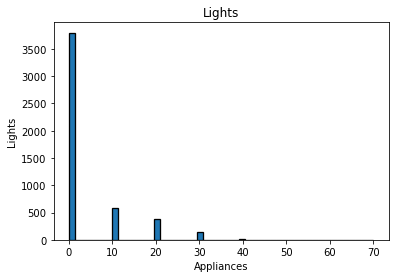

In [13]:
plt.hist(tclean.lights, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Lights")
plt.show()

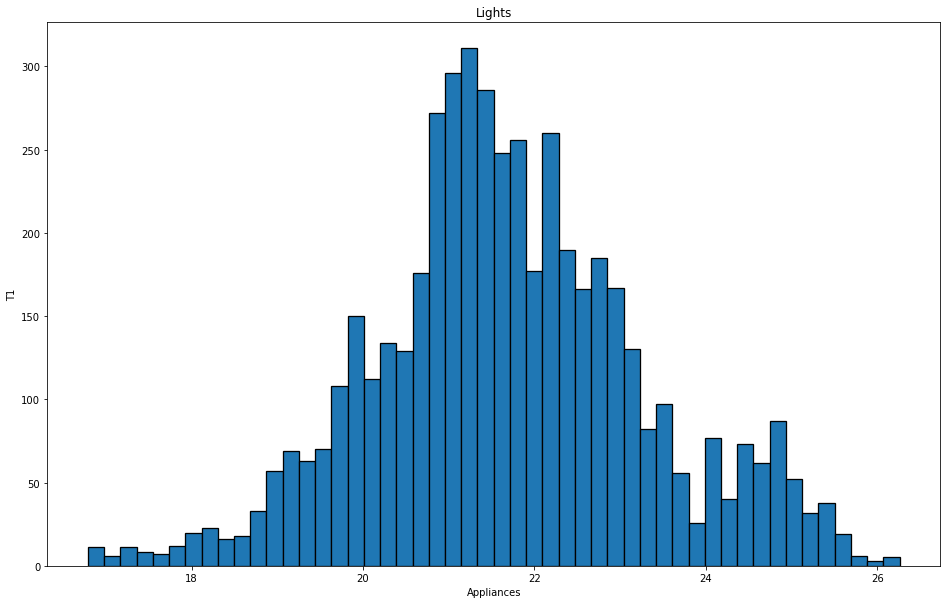

In [14]:
plt.hist(tclean.T1, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T1")
plt.show()

In [15]:
print("The mean is 23 wher minimum is 6 and maximum is 29 and the rest of the histogram will behave similarly unless it is dificult to determin from the histogram")

The mean is 23 wher minimum is 6 and maximum is 29 and the rest of the histogram will behave similarly unless it is dificult to determin from the histogram


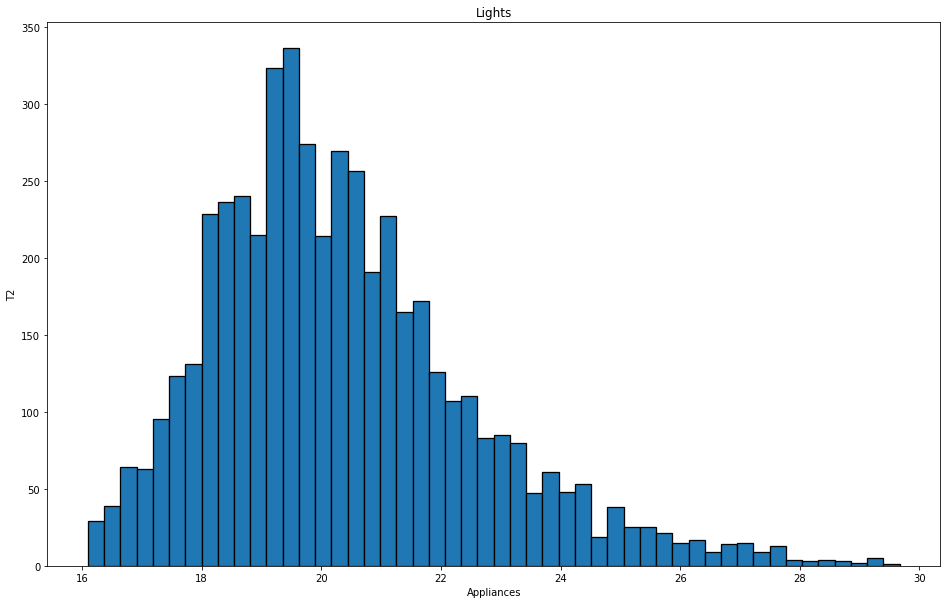

In [16]:
 plt.hist(tclean.T2, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T2")
plt.show()

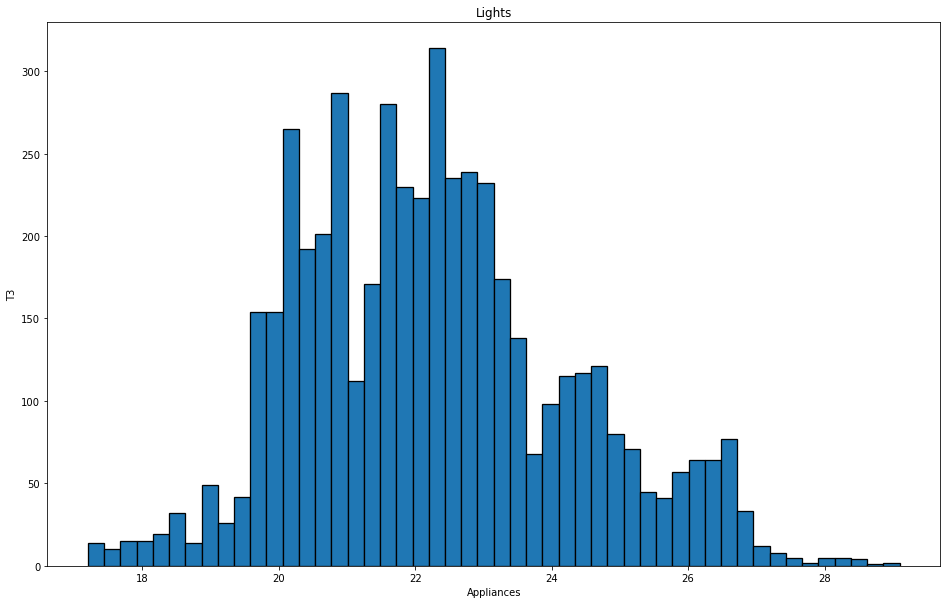

In [17]:
plt.hist(tclean.T3, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T3")
plt.show()

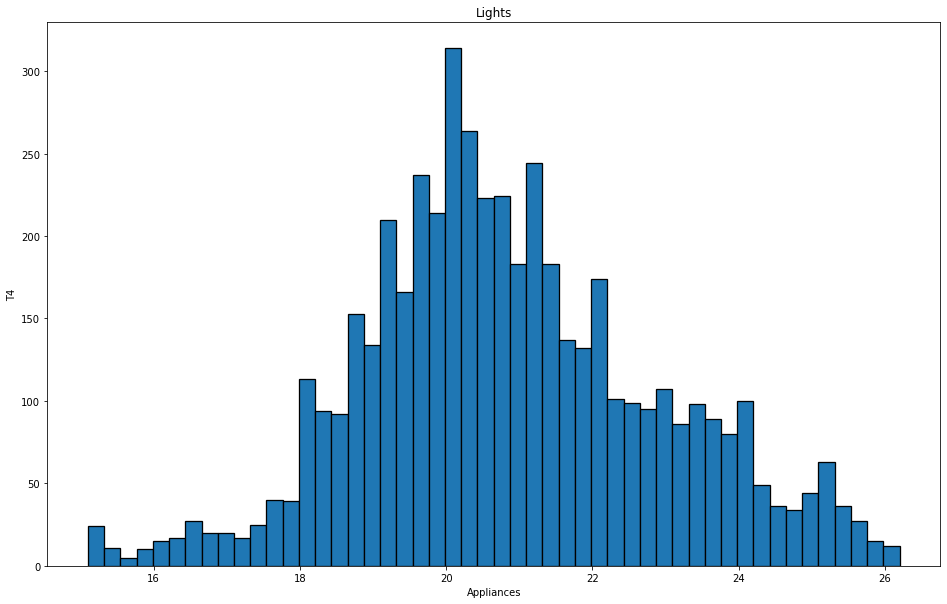

In [18]:
plt.hist(tclean.T4, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T4")
plt.show()

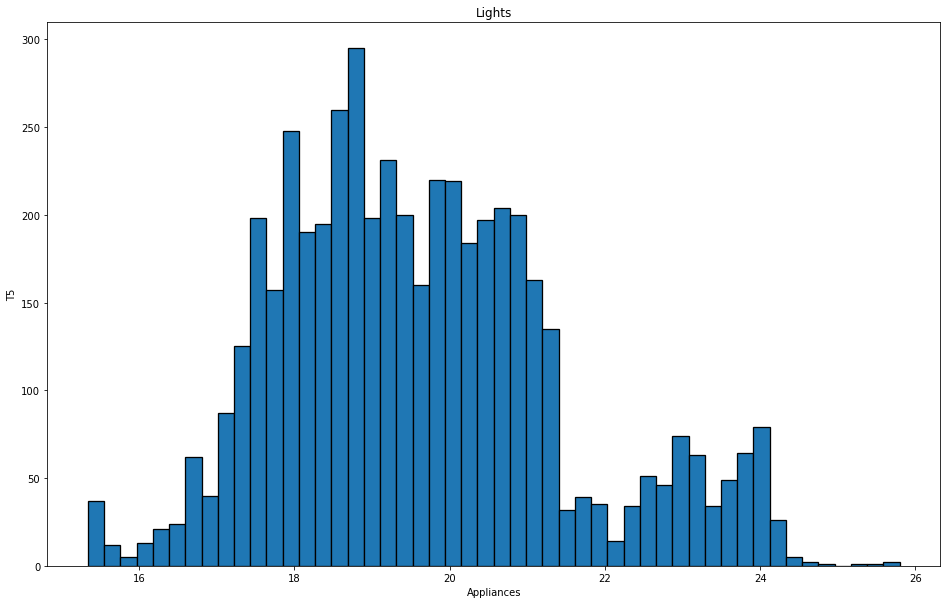

In [19]:
plt.hist(tclean.T5, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T5")
plt.show()

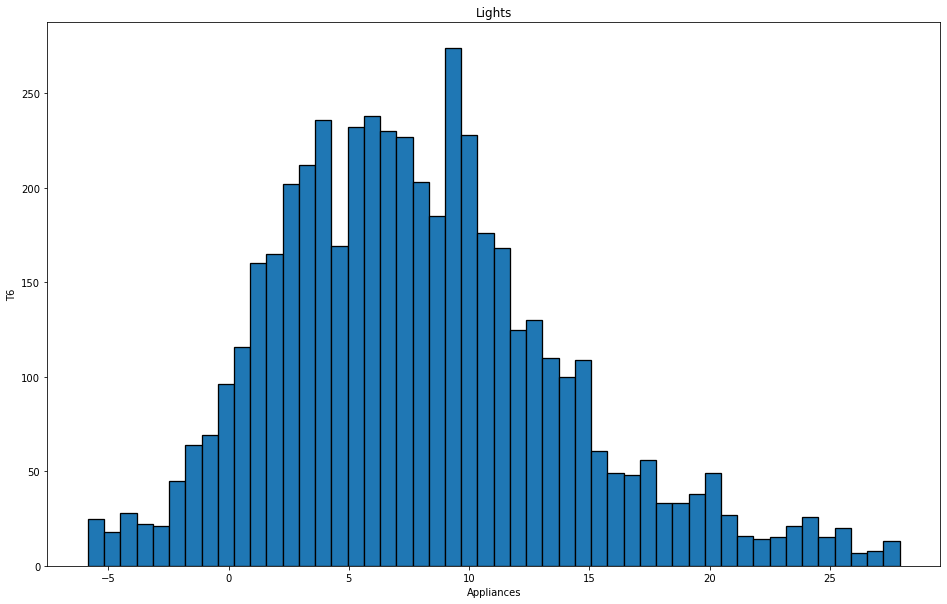

In [20]:
plt.hist(tclean.T6, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T6")
plt.show()

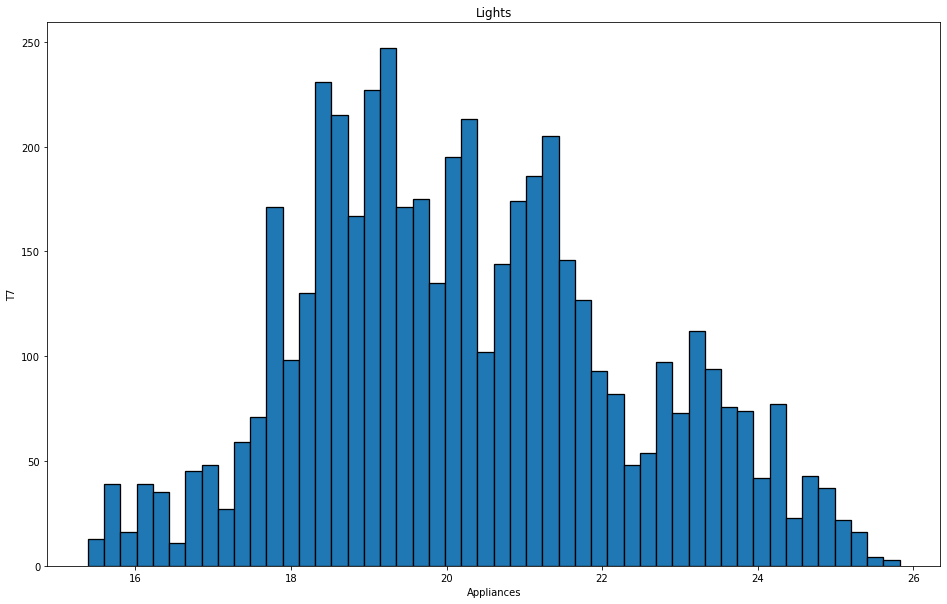

In [21]:
plt.hist(tclean.T7, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T7")
plt.show()

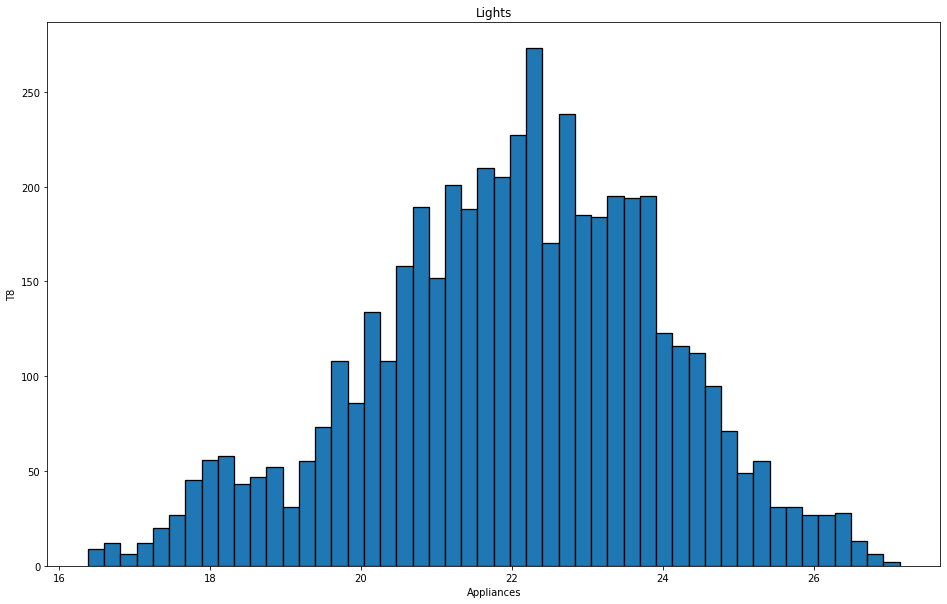

In [22]:
plt.hist(tclean.T8, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T8")
plt.show()

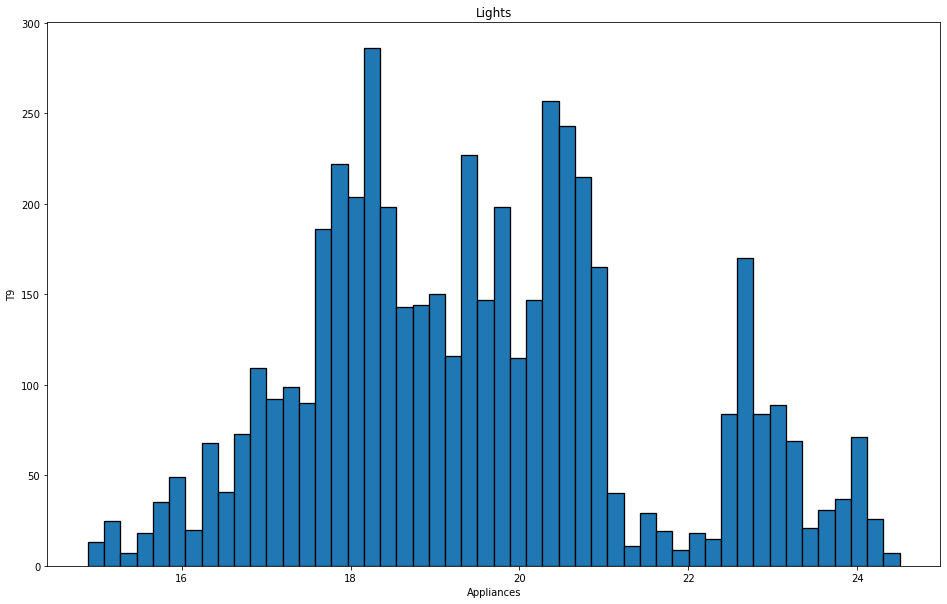

In [23]:
plt.hist(tclean.T9, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T9")
plt.show()

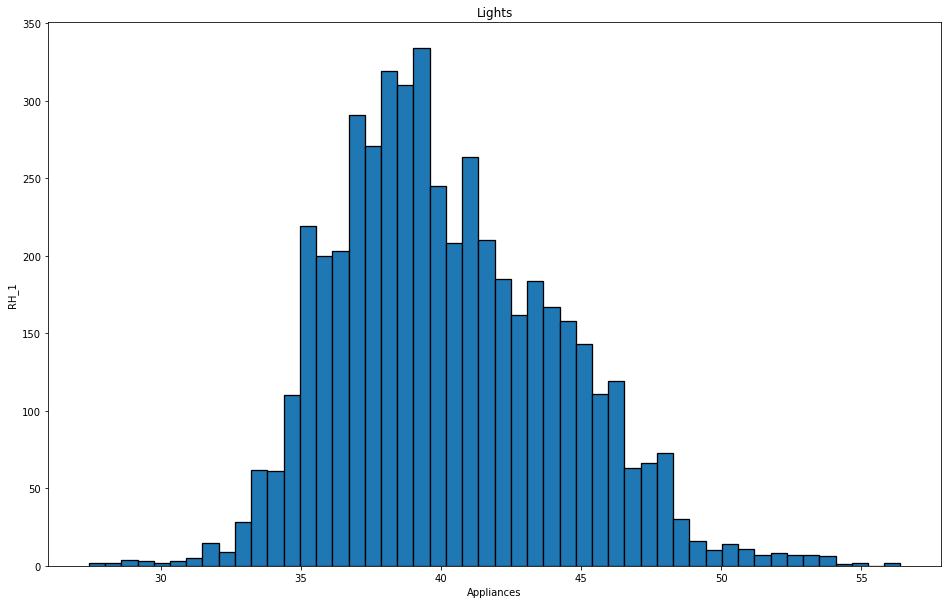

In [24]:
plt.hist(tclean.RH_1, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_1")
plt.show()

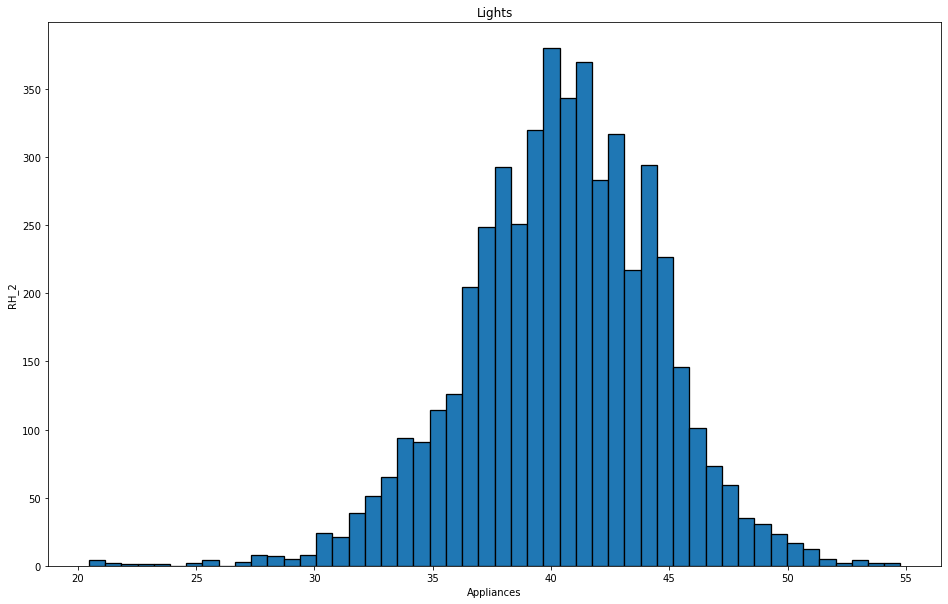

In [25]:
plt.hist(tclean.RH_2, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_2")
plt.show()

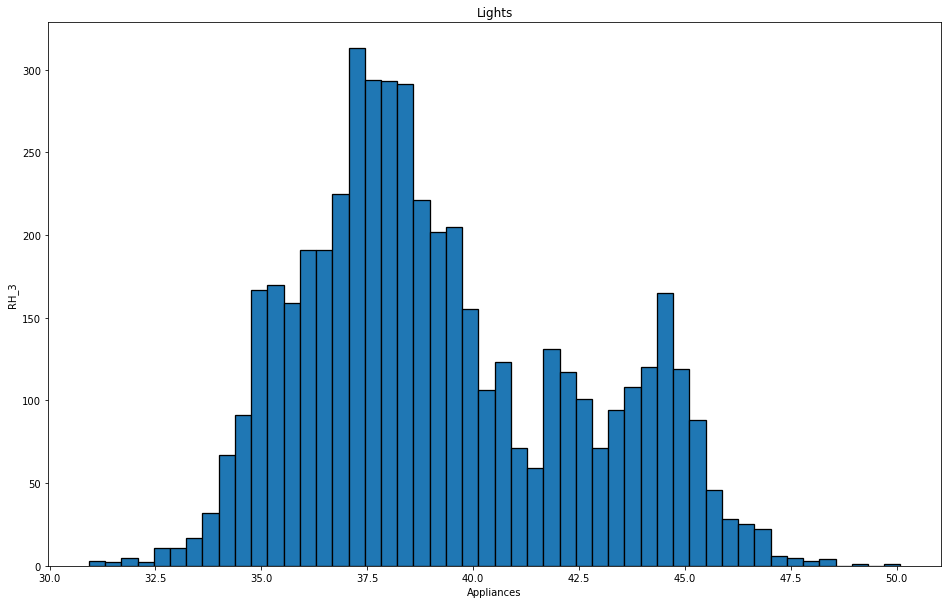

In [26]:
plt.hist(tclean.RH_3, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_3")
plt.show()

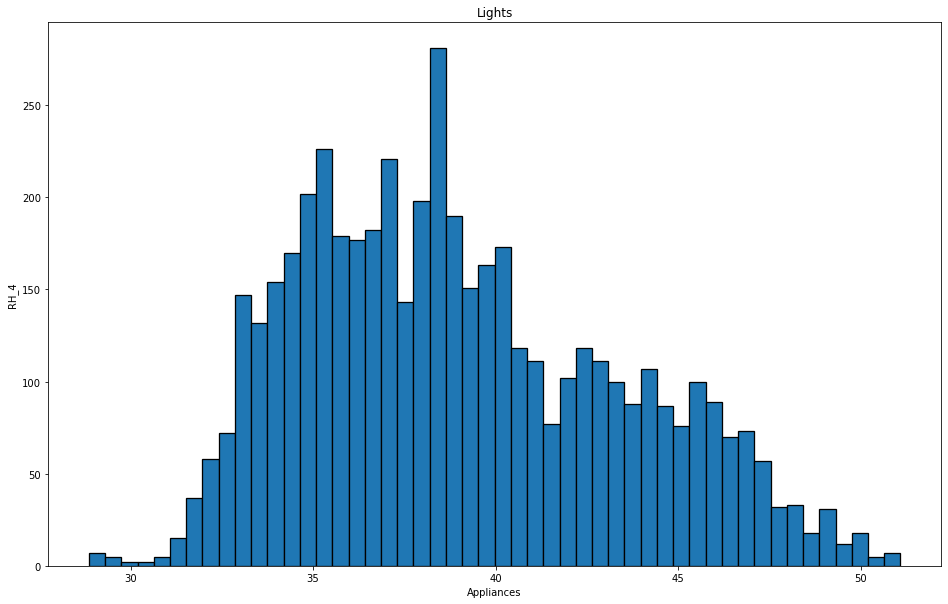

In [27]:
plt.hist(tclean.RH_4, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_4")
plt.show()

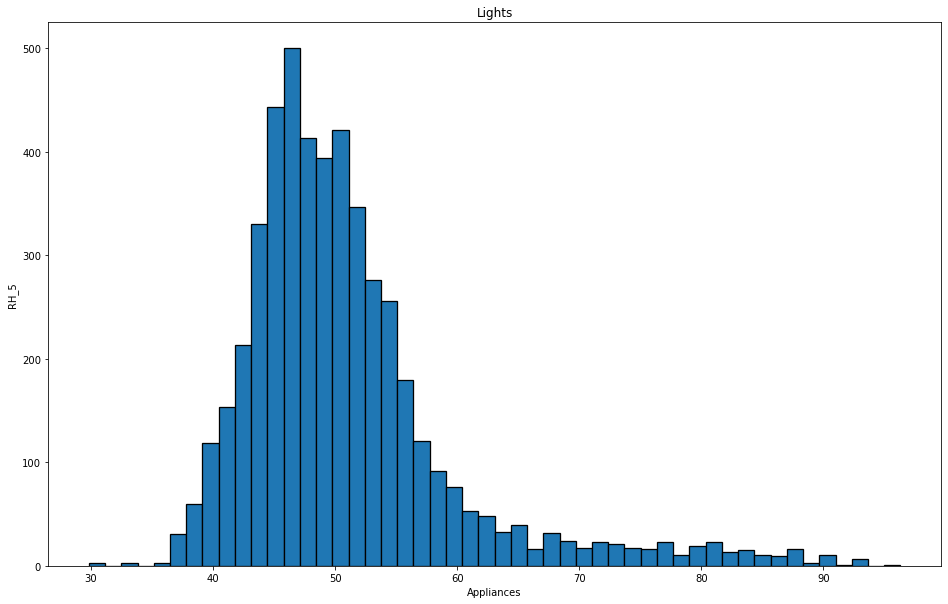

In [28]:
plt.hist(tclean.RH_5, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_5")
plt.show()

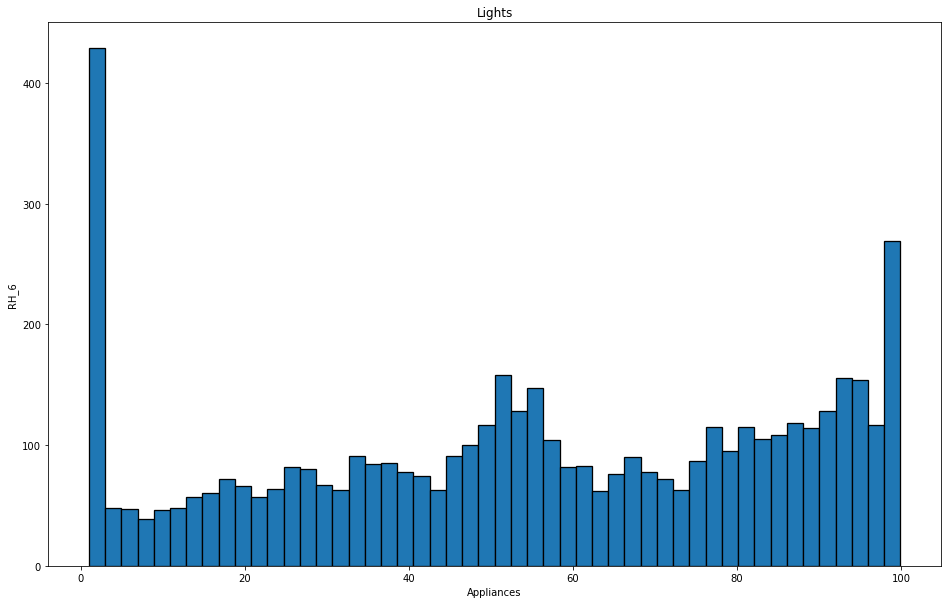

In [29]:
plt.hist(tclean.RH_6, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_6")
plt.show()

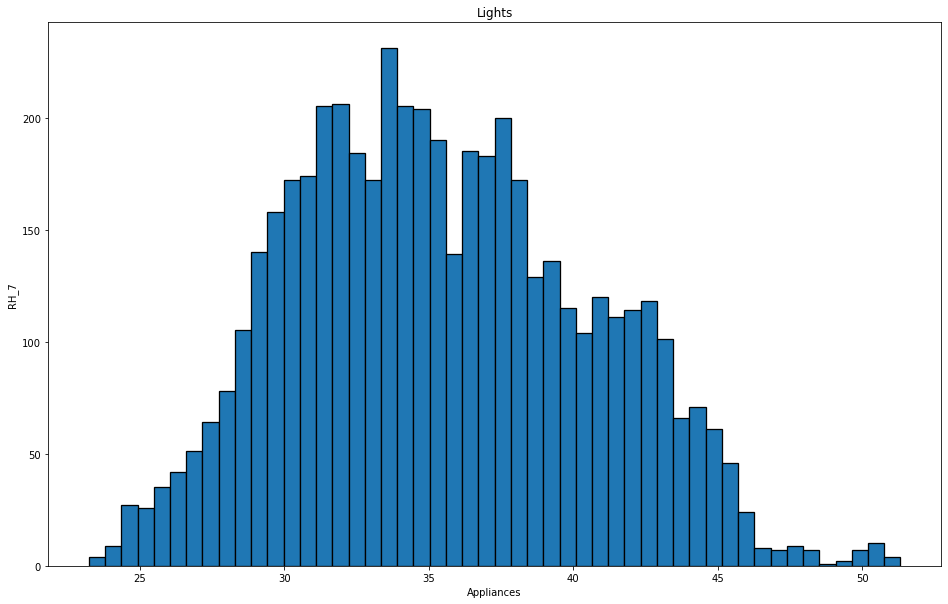

In [30]:
plt.hist(tclean.RH_7, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_7")
plt.show()

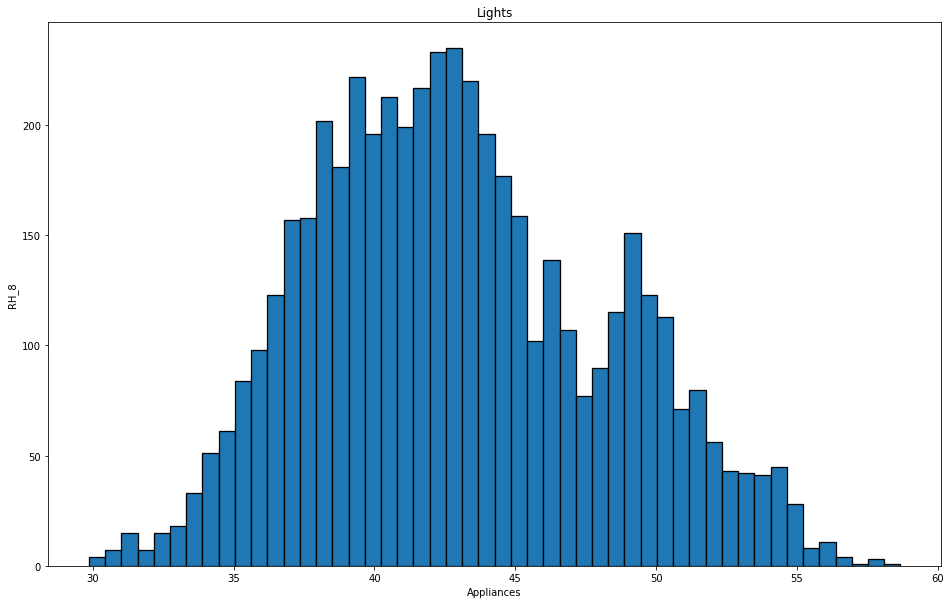

In [31]:
plt.hist(tclean.RH_8, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_8")
plt.show()

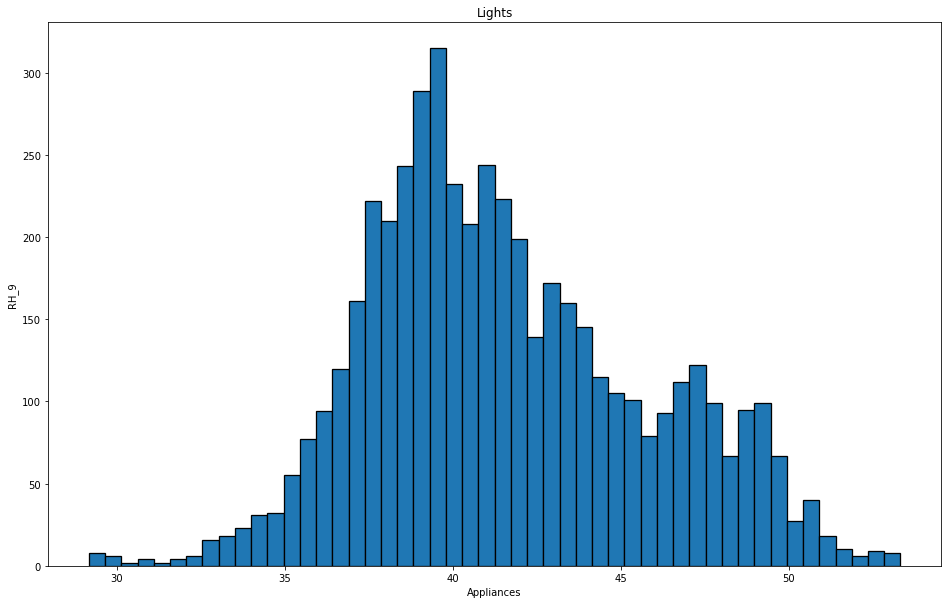

In [32]:
plt.hist(tclean.RH_9, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_9")
plt.show()

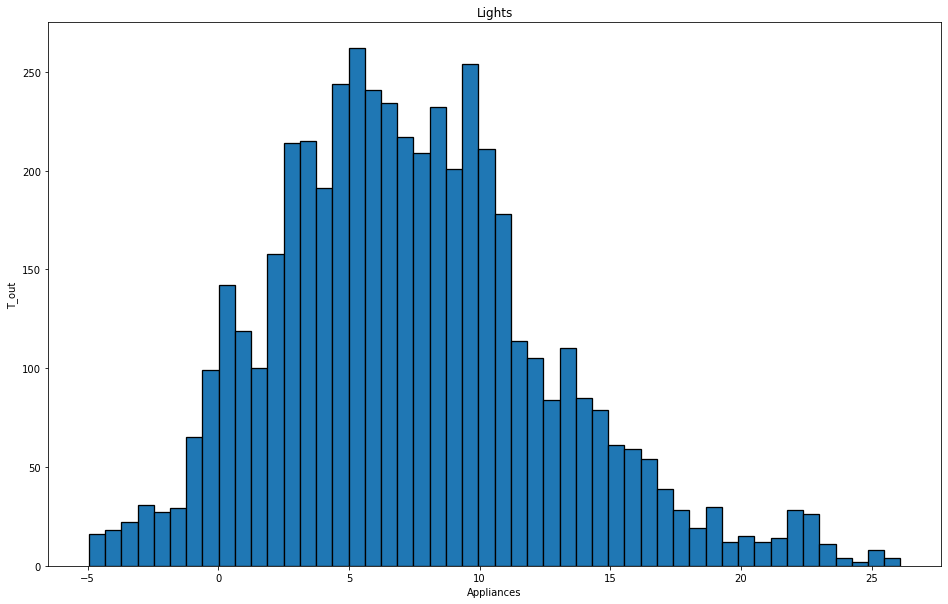

In [33]:
plt.hist(tclean.T_out, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("T_out")
plt.show()

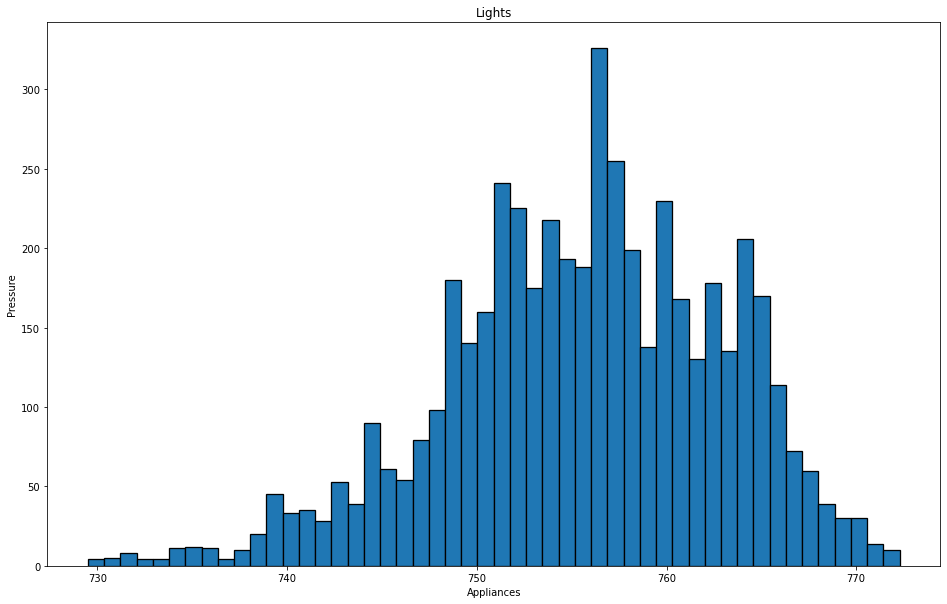

In [34]:
plt.hist(tclean.Press_mm_hg, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Pressure")
plt.show()

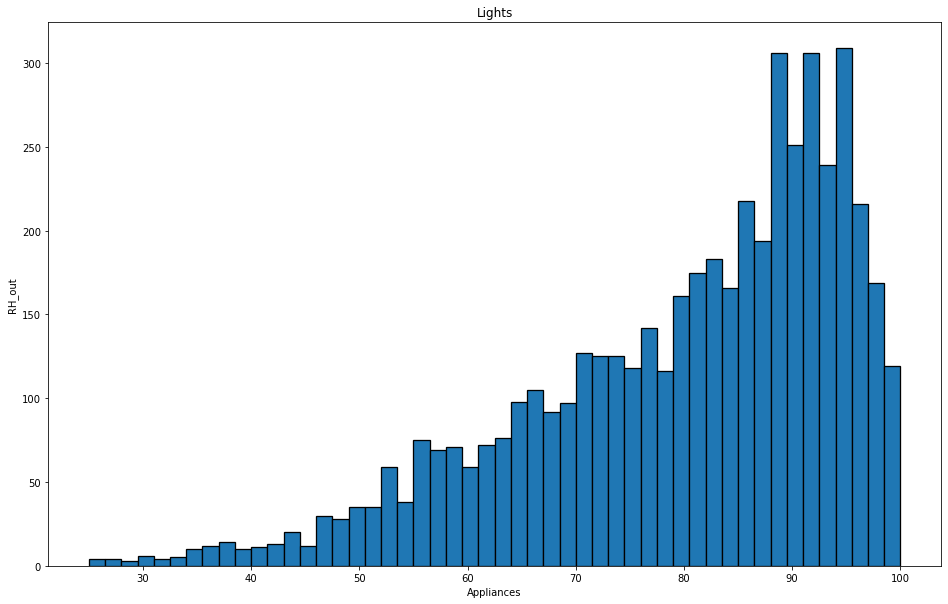

In [35]:
plt.hist(tclean.RH_out, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("RH_out")
plt.show()

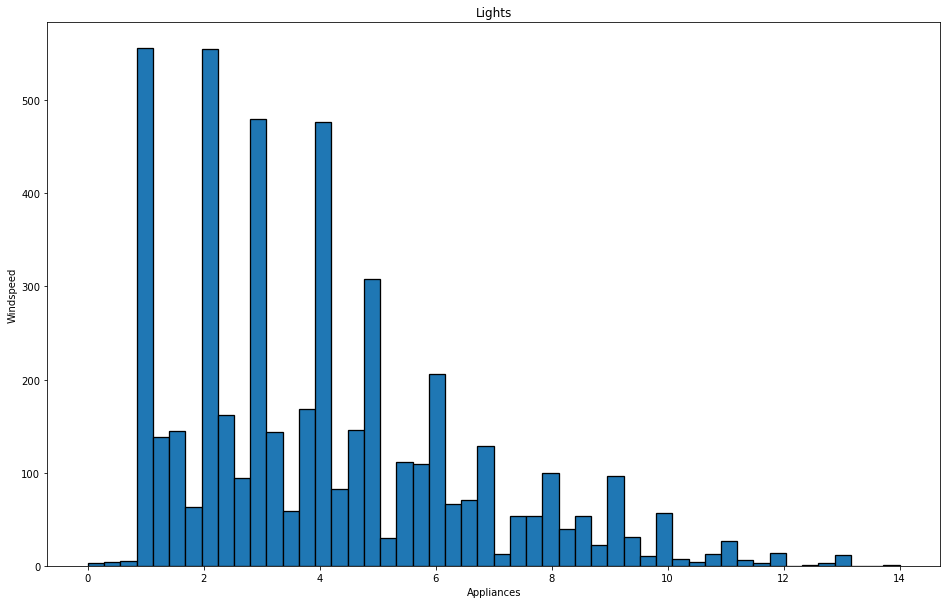

In [36]:
plt.hist(tclean.Windspeed, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Windspeed")
plt.show()

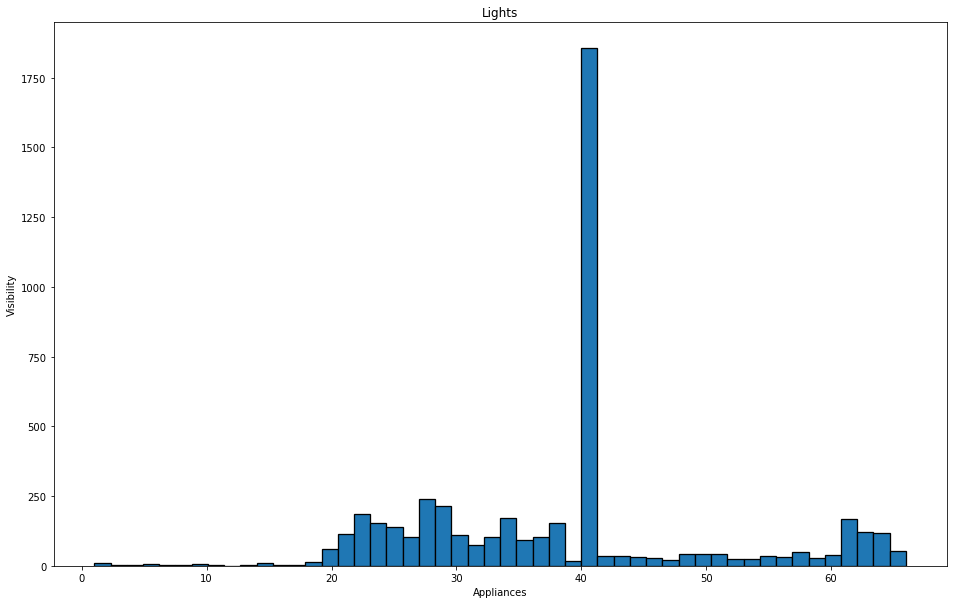

In [37]:
plt.hist(tclean.Visibility, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Visibility")
plt.show()

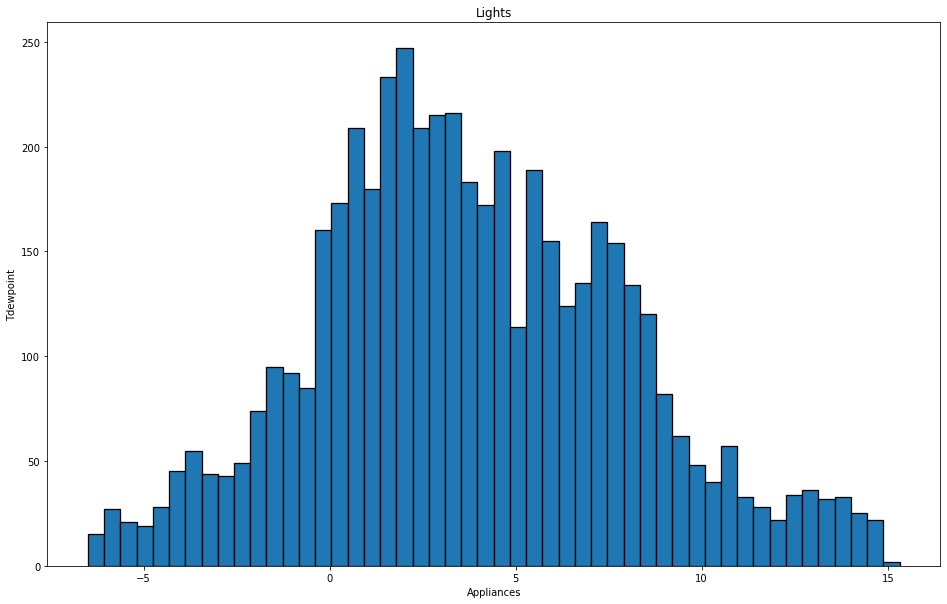

In [38]:
plt.hist(tclean.Tdewpoint, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Tdewpoint")
plt.show()

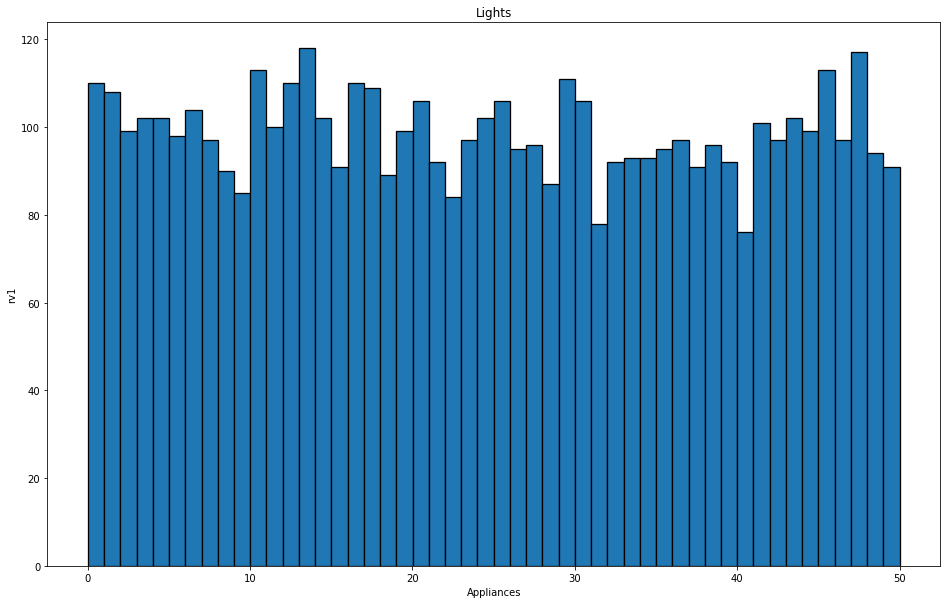

In [39]:
plt.hist(tclean.rv1, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("rv1")
plt.show()

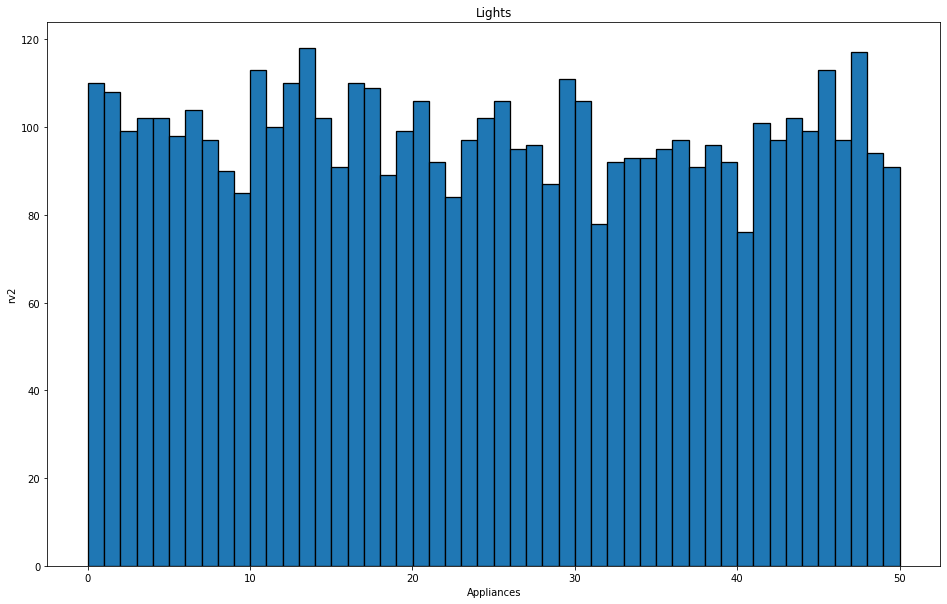

In [40]:
plt.hist(tclean.rv2, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("rv2")
plt.show()

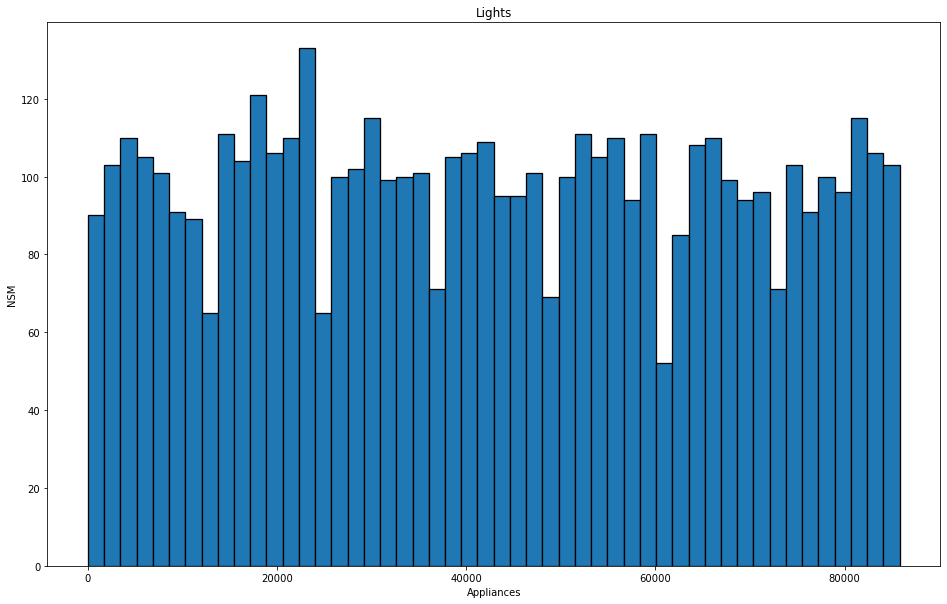

In [41]:
plt.hist(tclean.NSM, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("NSM")
plt.show()

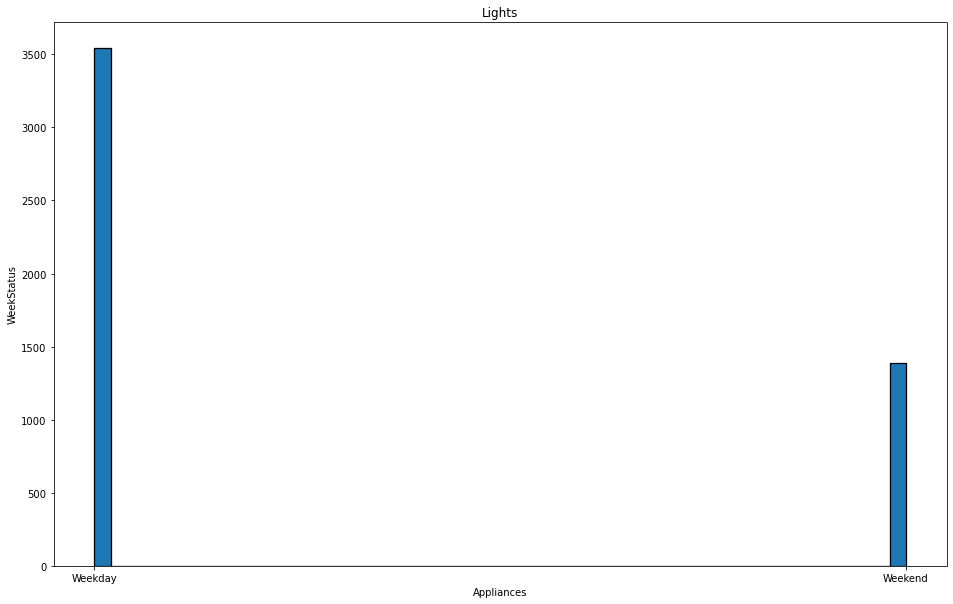

In [42]:
plt.hist(tclean.WeekStatus, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("WeekStatus")
plt.show()

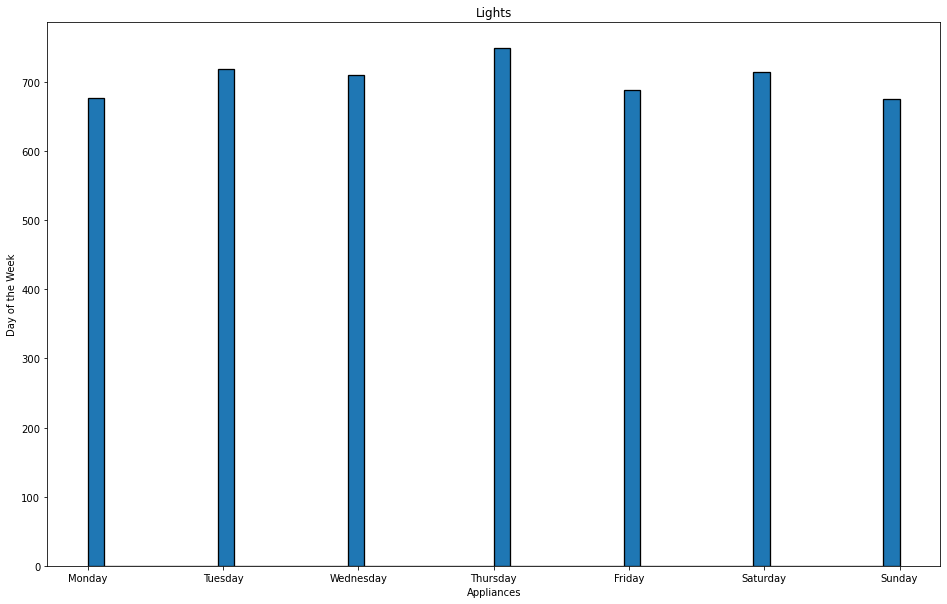

In [43]:
plt.hist(tclean.Day_of_week, bins=50, edgecolor='black', linewidth=1.3)
plt.rcParams["figure.figsize"] = [16, 10]
plt.title("Lights")
plt.xlabel("Appliances")
plt.ylabel("Day of the Week")
plt.show()

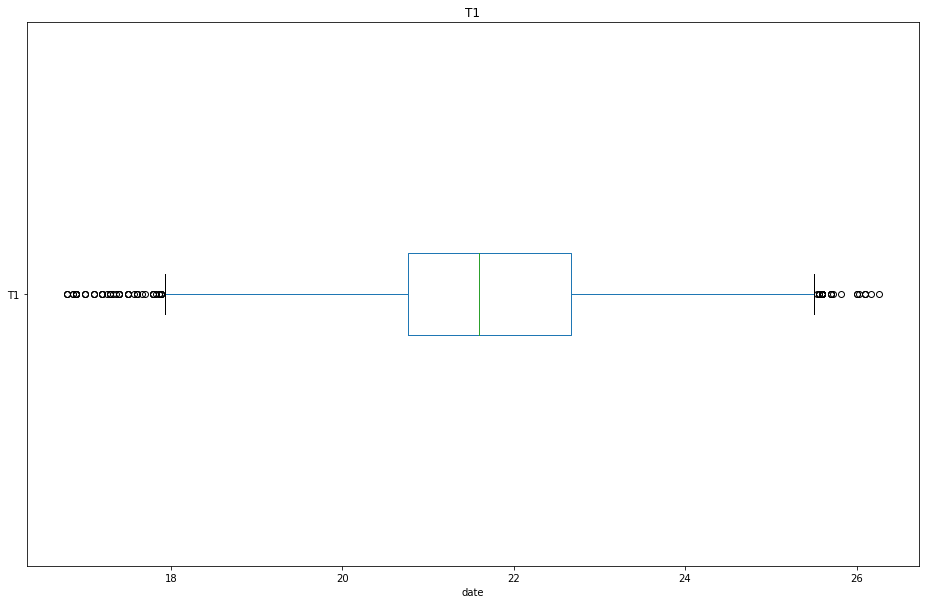

In [44]:
tclean.T1.plot.box(vert=False)
plt.xlabel("date")
plt.title("T1")
plt.show()

In [45]:
print("The mean value is 20 and the minimum is about 8 and maximum is 25 and similarly the rest of the graph will behave similarly")

The mean value is 20 and the minimum is about 8 and maximum is 25 and similarly the rest of the graph will behave similarly


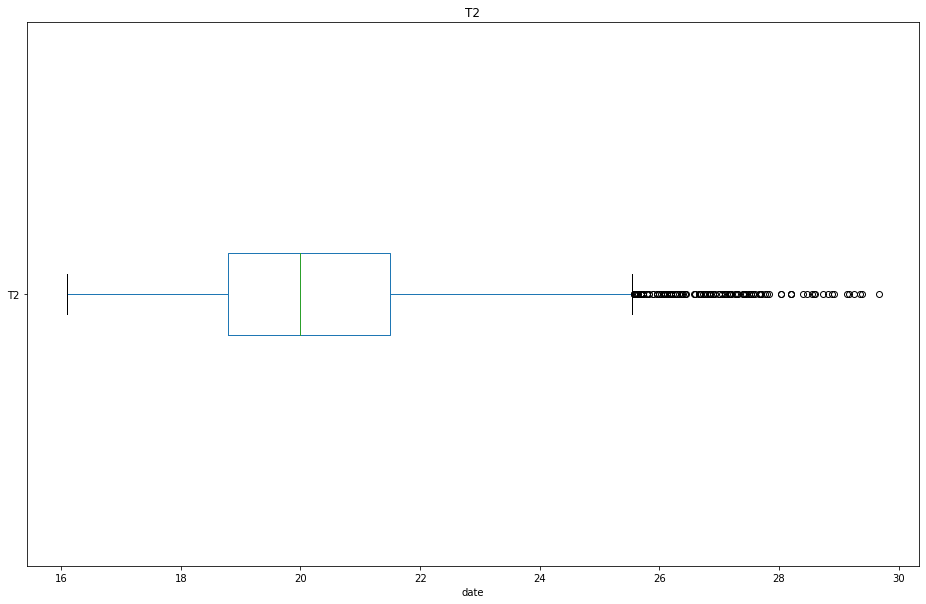

In [46]:
tclean.T2.plot.box(vert=False)
plt.xlabel("date")
plt.title("T2")
plt.show()

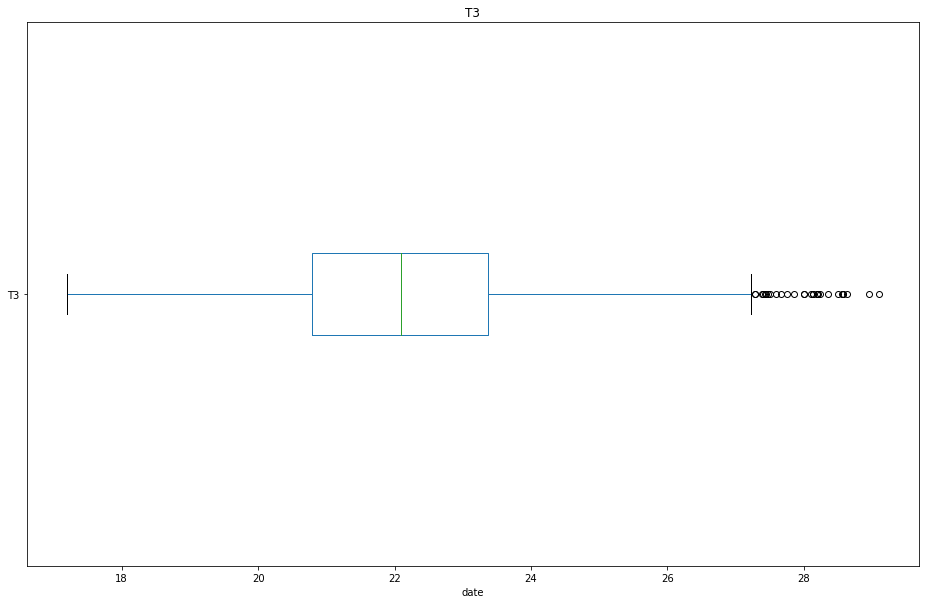

In [47]:
tclean.T3.plot.box(vert=False)
plt.xlabel("date")
plt.title("T3")
plt.show()

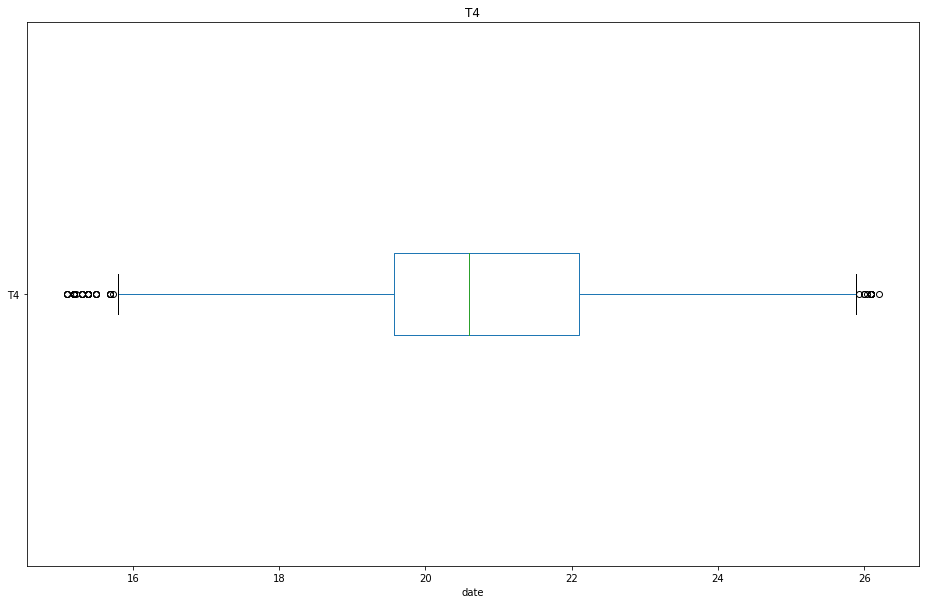

In [48]:
tclean.T4.plot.box(vert=False)
plt.xlabel("date")
plt.title("T4")
plt.show()

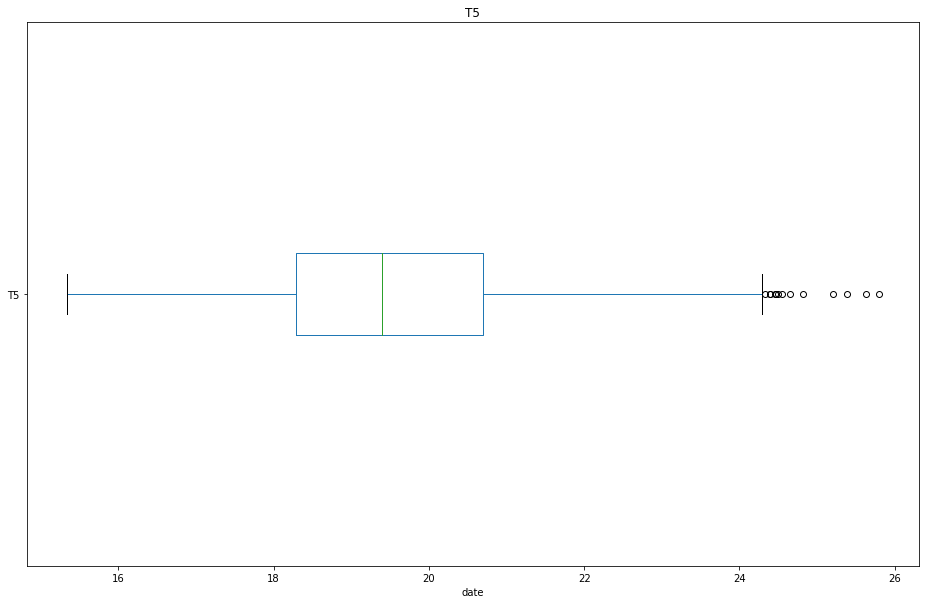

In [49]:
tclean.T5.plot.box(vert=False)
plt.xlabel("date")
plt.title("T5")
plt.show()

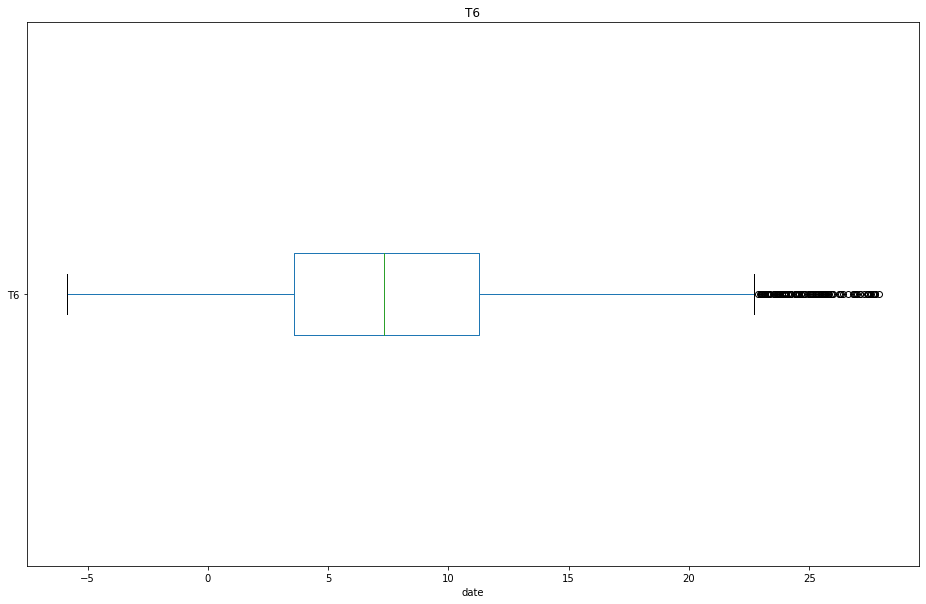

In [50]:
tclean.T6.plot.box(vert=False)
plt.xlabel("date")
plt.title("T6")
plt.show()

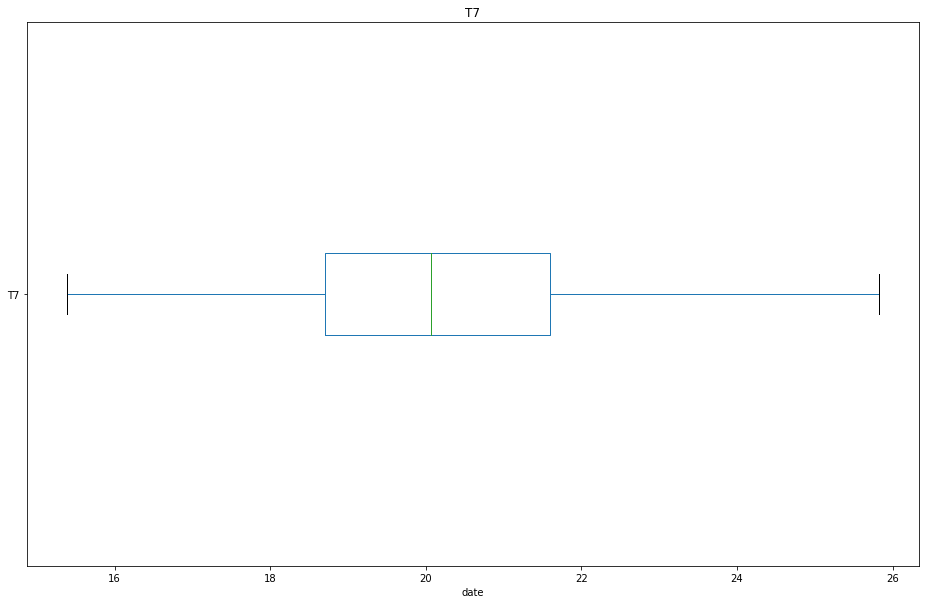

In [51]:
tclean.T7.plot.box(vert=False)
plt.xlabel("date")
plt.title("T7")
plt.show()

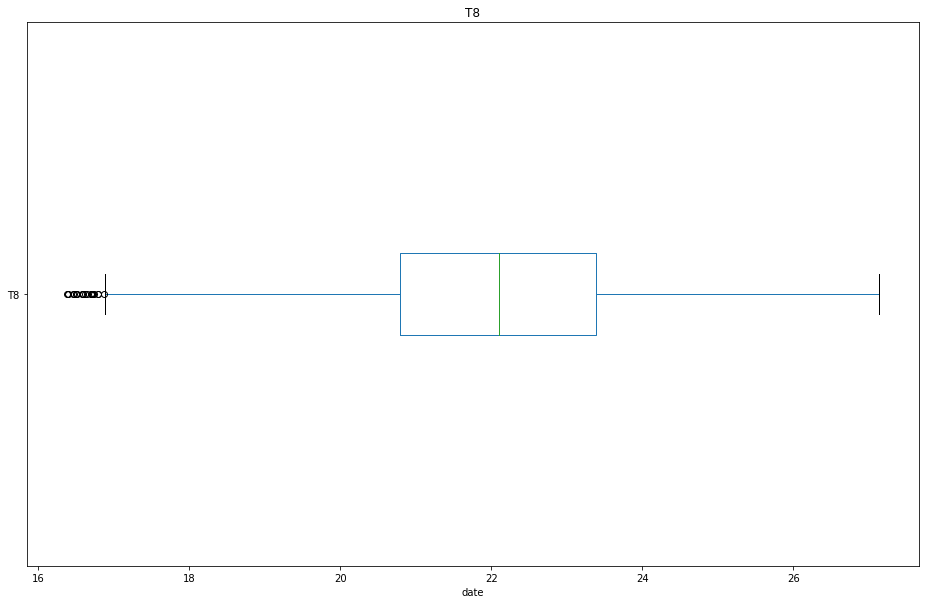

In [52]:
tclean.T8.plot.box(vert=False)
plt.xlabel("date")
plt.title("T8")
plt.show()

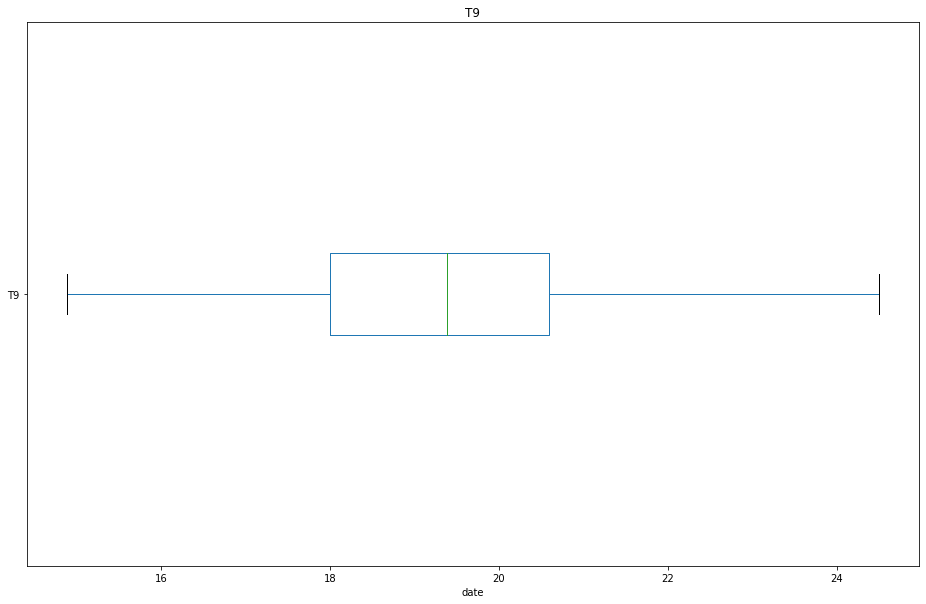

In [53]:
tclean.T9.plot.box(vert=False)
plt.xlabel("date")
plt.title("T9")
plt.show()

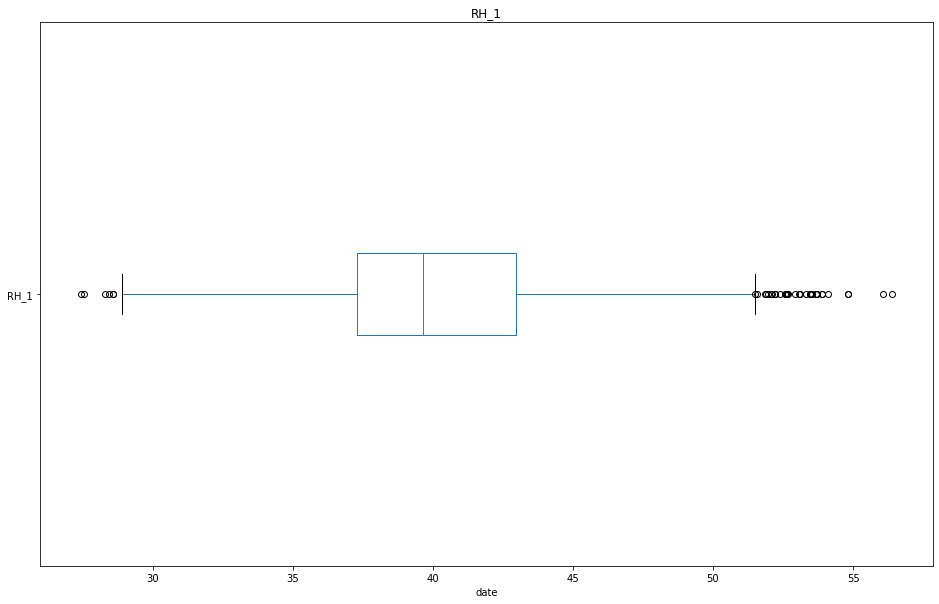

In [54]:
tclean.RH_1.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_1")
plt.show()

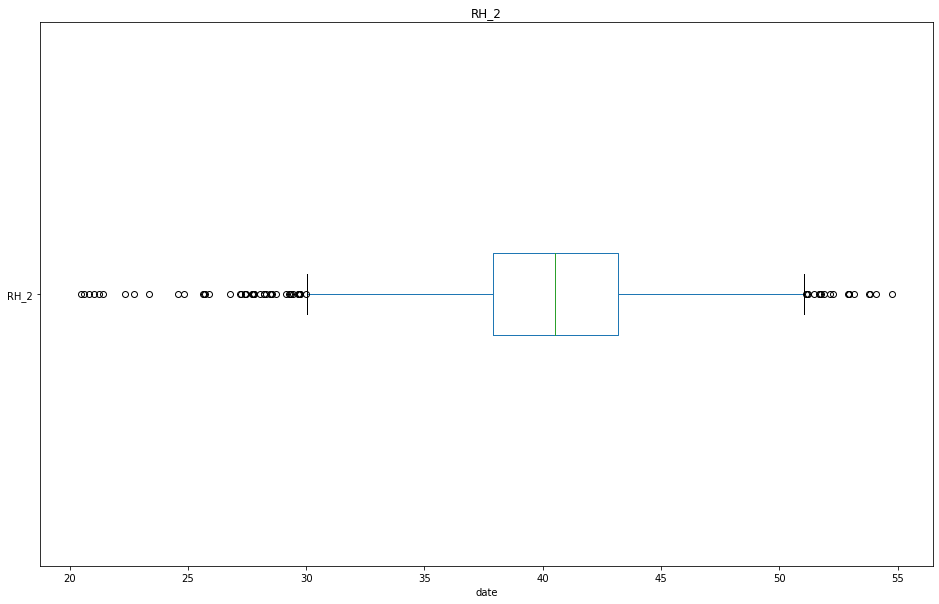

In [55]:
tclean.RH_2.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_2")
plt.show()

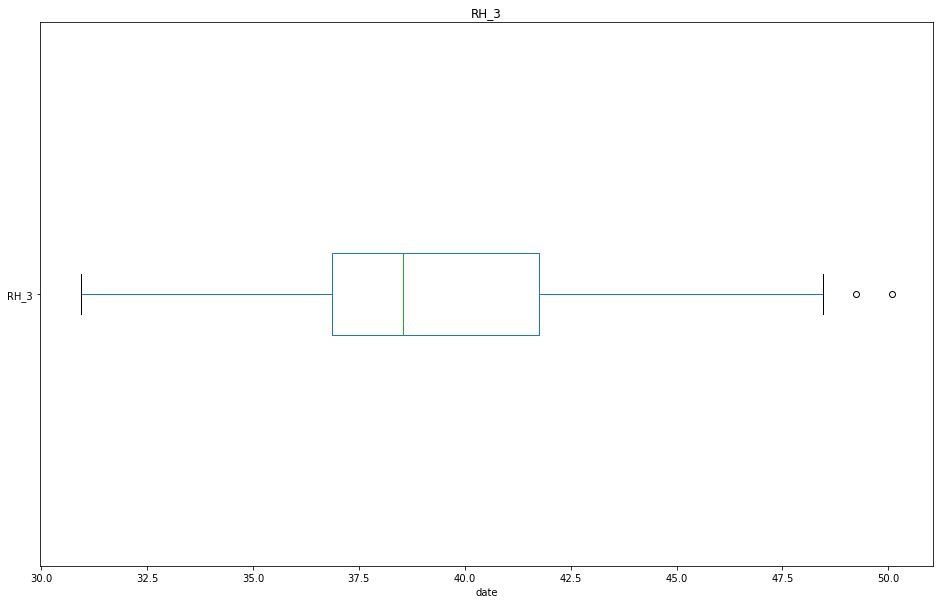

In [56]:
tclean.RH_3.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_3")
plt.show()

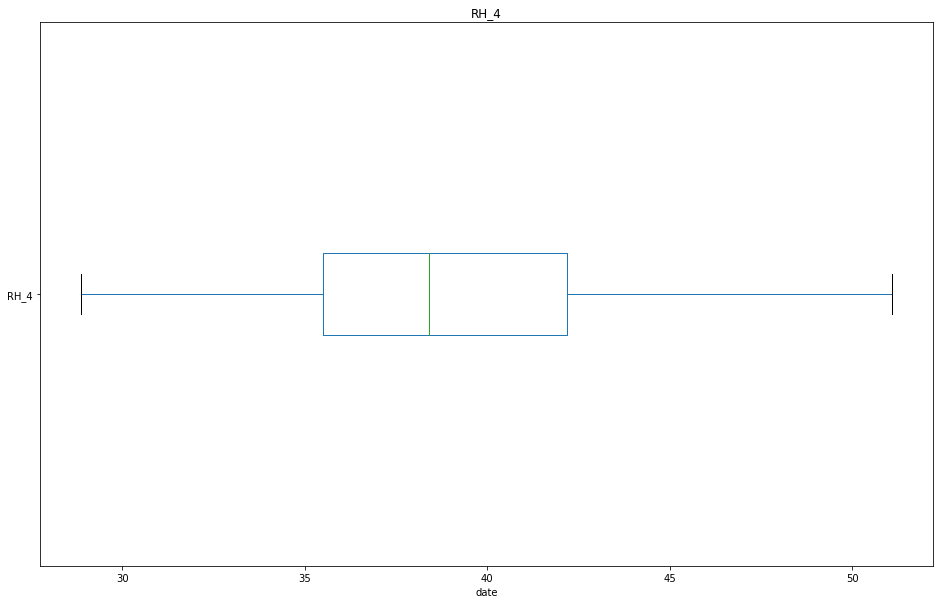

In [57]:
tclean.RH_4.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_4")
plt.show()

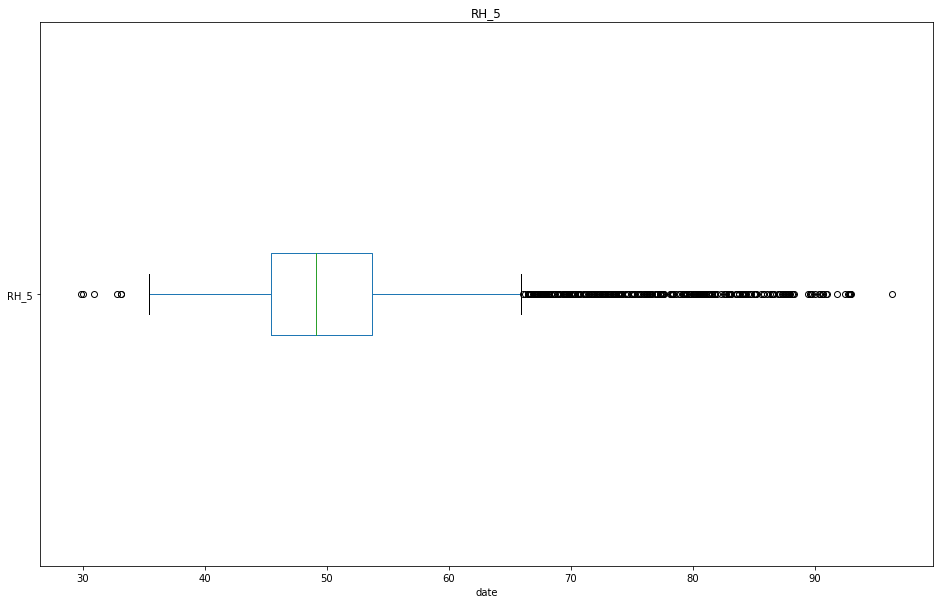

In [58]:
tclean.RH_5.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_5")
plt.show()

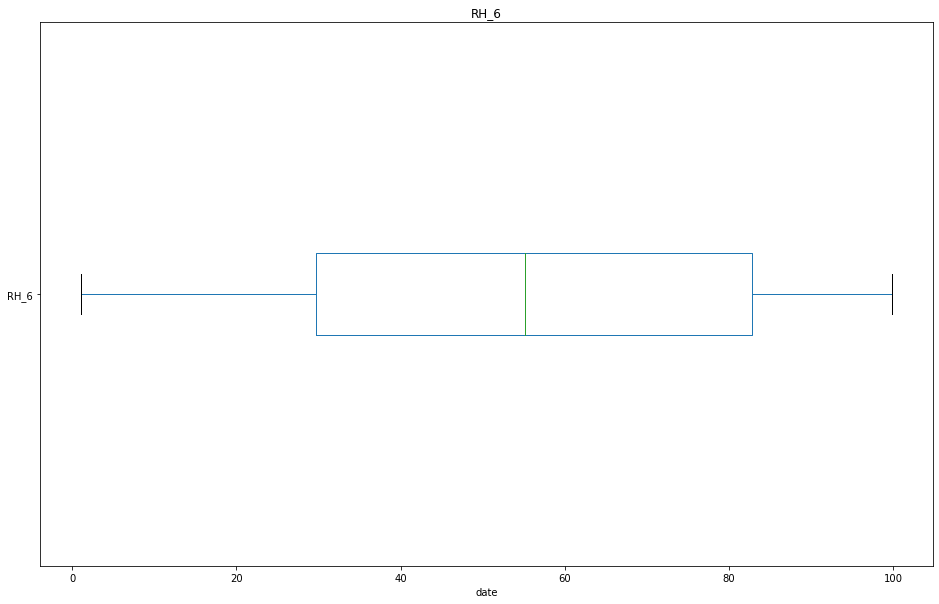

In [59]:
tclean.RH_6.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_6")
plt.show()

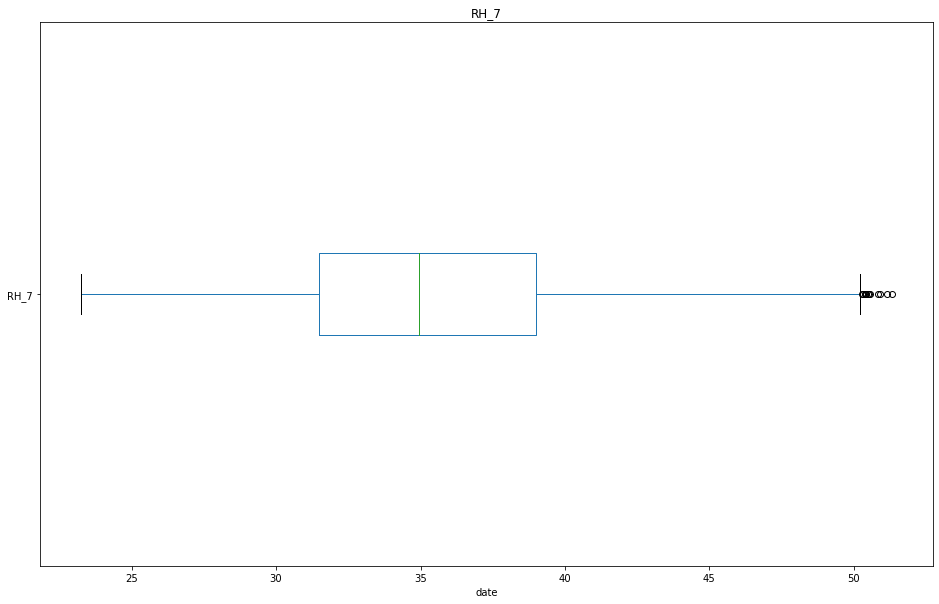

In [60]:
tclean.RH_7.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_7")
plt.show()

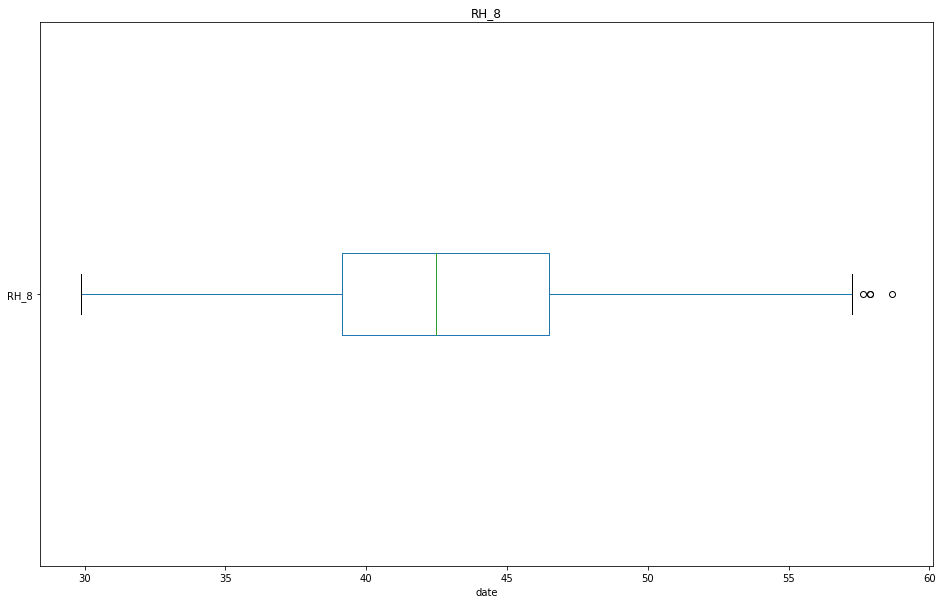

In [61]:
tclean.RH_8.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_8")
plt.show()

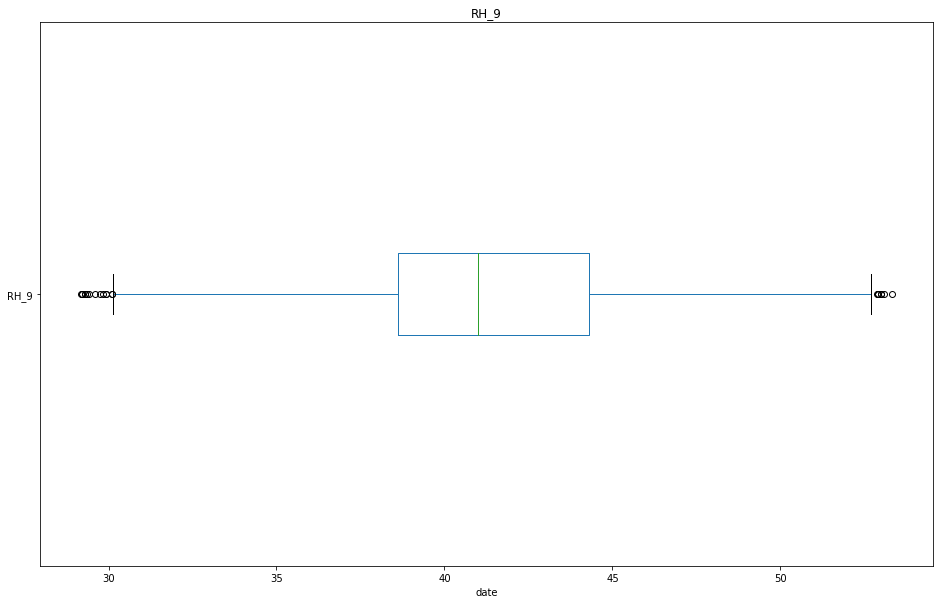

In [62]:
tclean.RH_9.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_9")
plt.show()

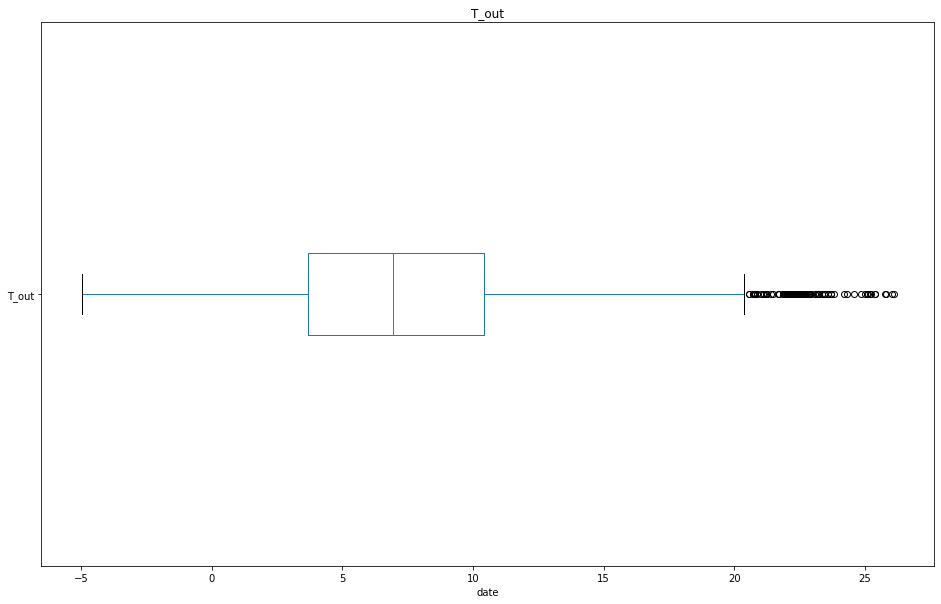

In [63]:
tclean.T_out.plot.box(vert=False)
plt.xlabel("date")
plt.title("T_out")
plt.show()

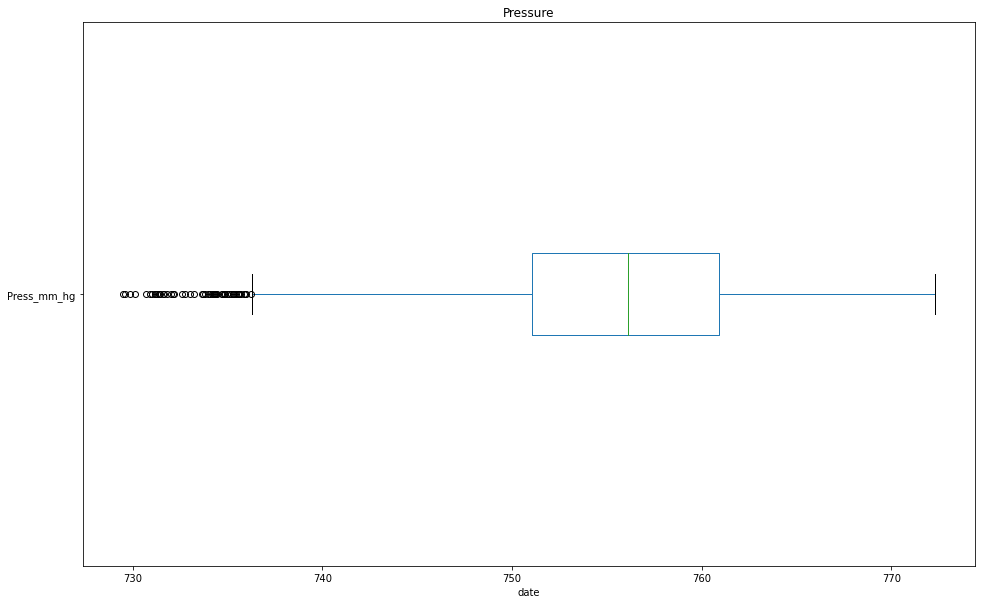

In [64]:
tclean.Press_mm_hg.plot.box(vert=False)
plt.xlabel("date")
plt.title("Pressure")
plt.show()

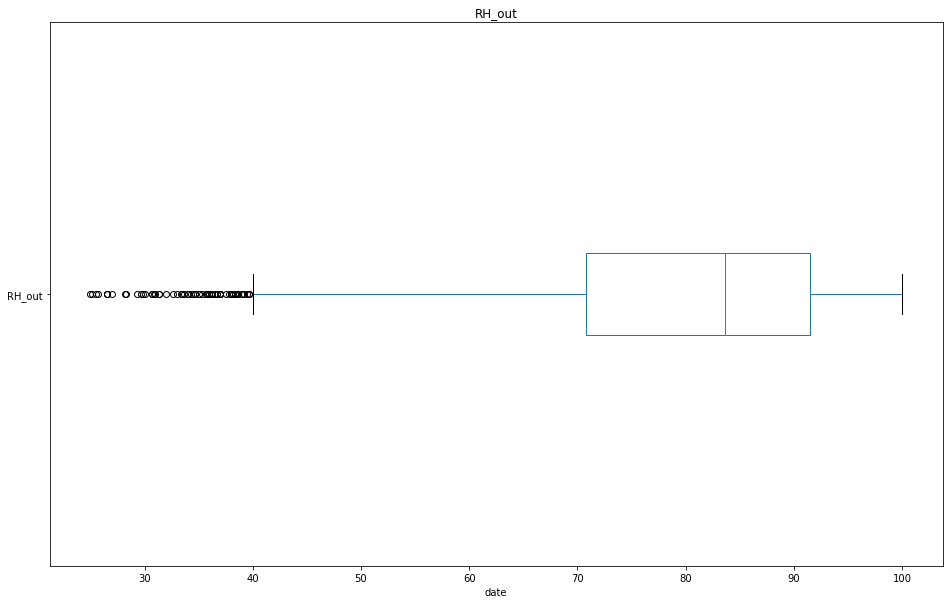

In [65]:
tclean.RH_out.plot.box(vert=False)
plt.xlabel("date")
plt.title("RH_out")
plt.show()

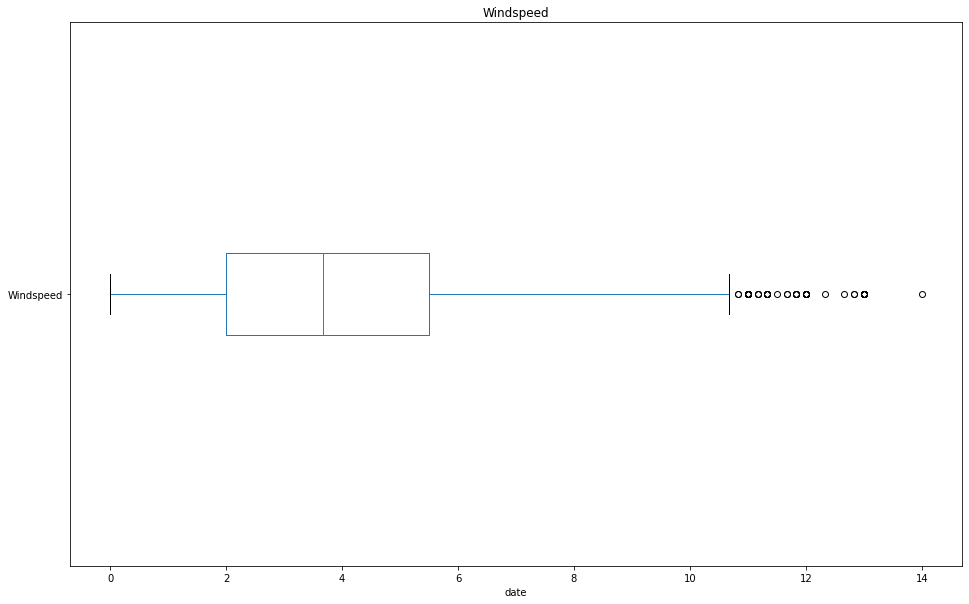

In [66]:
tclean.Windspeed.plot.box(vert=False)
plt.xlabel("date")
plt.title("Windspeed")
plt.show()

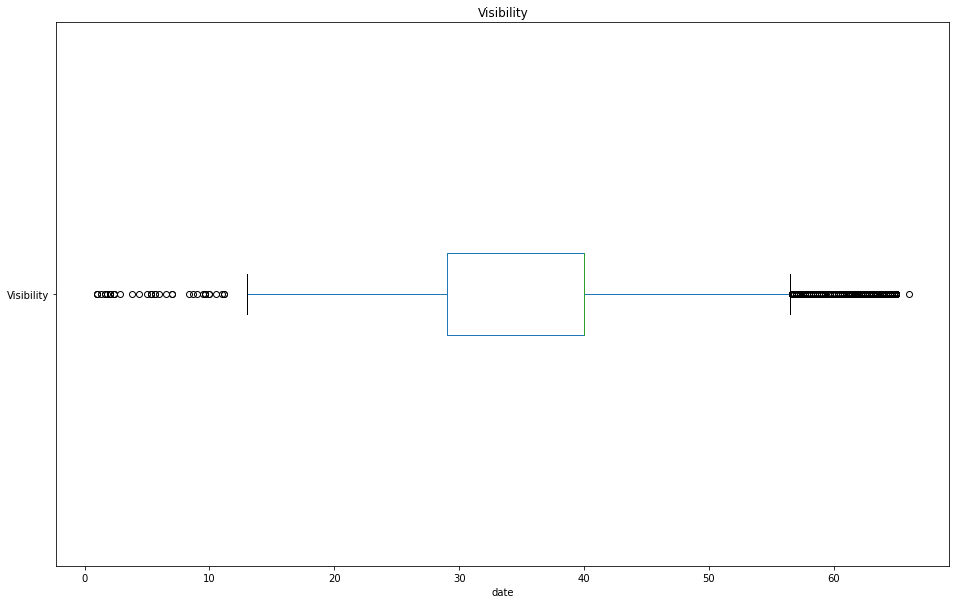

In [67]:
tclean.Visibility.plot.box(vert=False)
plt.xlabel("date")
plt.title("Visibility")
plt.show()

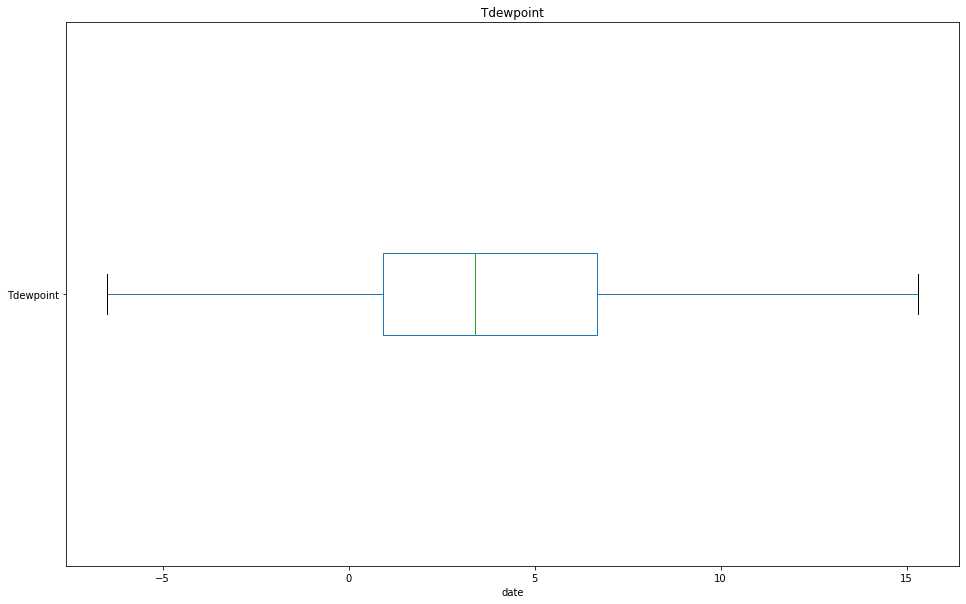

In [68]:
tclean.Tdewpoint.plot.box(vert=False)
plt.xlabel("date")
plt.title("Tdewpoint")
plt.show()

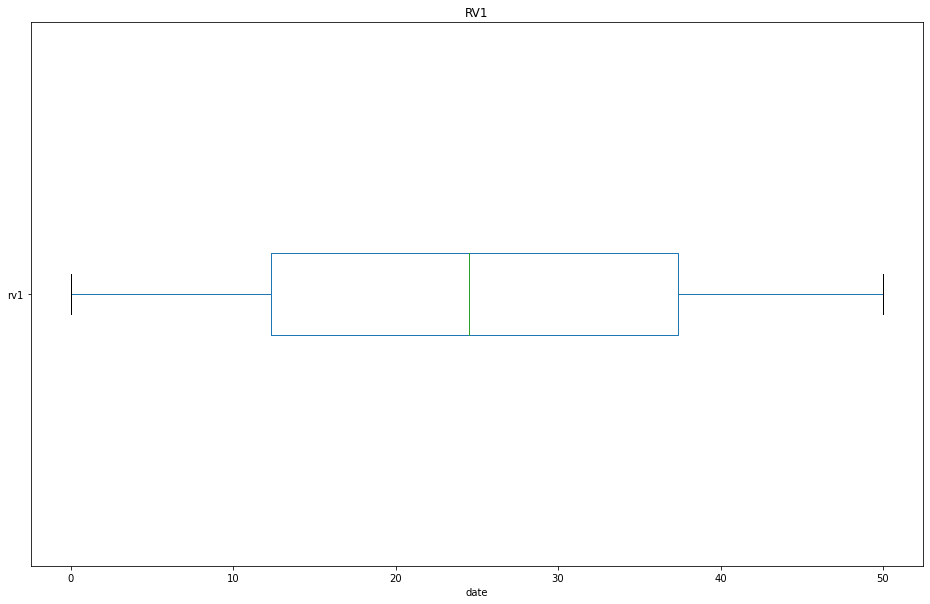

In [69]:
tclean.rv1.plot.box(vert=False)
plt.xlabel("date")
plt.title("RV1")
plt.show()

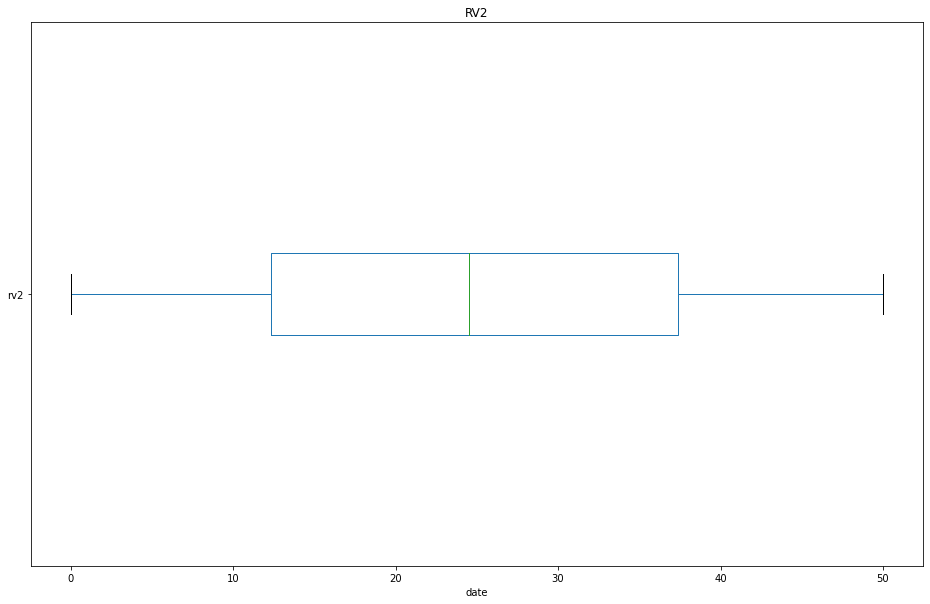

In [70]:
tclean.rv2.plot.box(vert=False)
plt.xlabel("date")
plt.title("RV2")
plt.show()

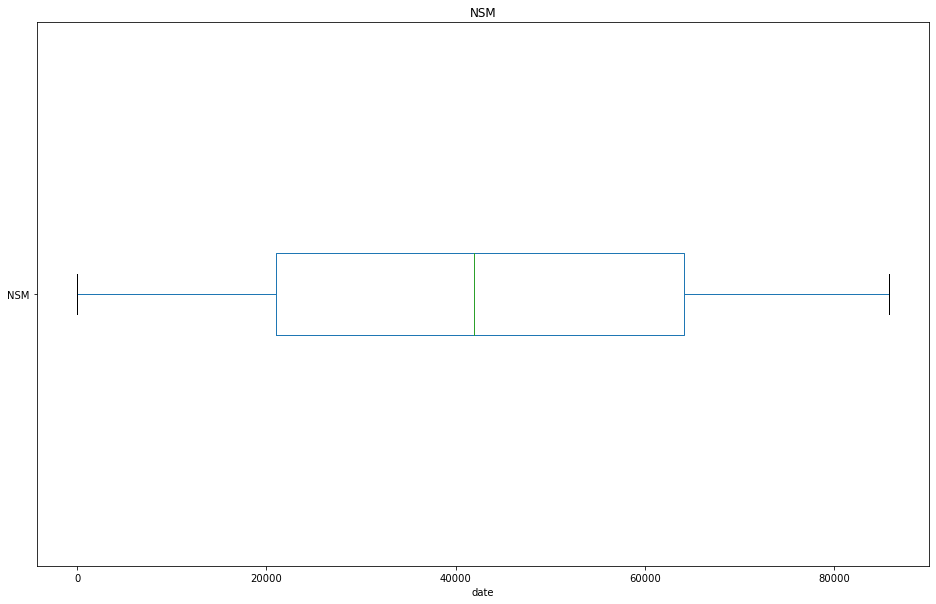

In [71]:
tclean.NSM.plot.box(vert=False)
plt.xlabel("date")
plt.title("NSM")
plt.show()

In [72]:
def corr(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy = (0.1, 0.9), xycoords = ax.transAxes)

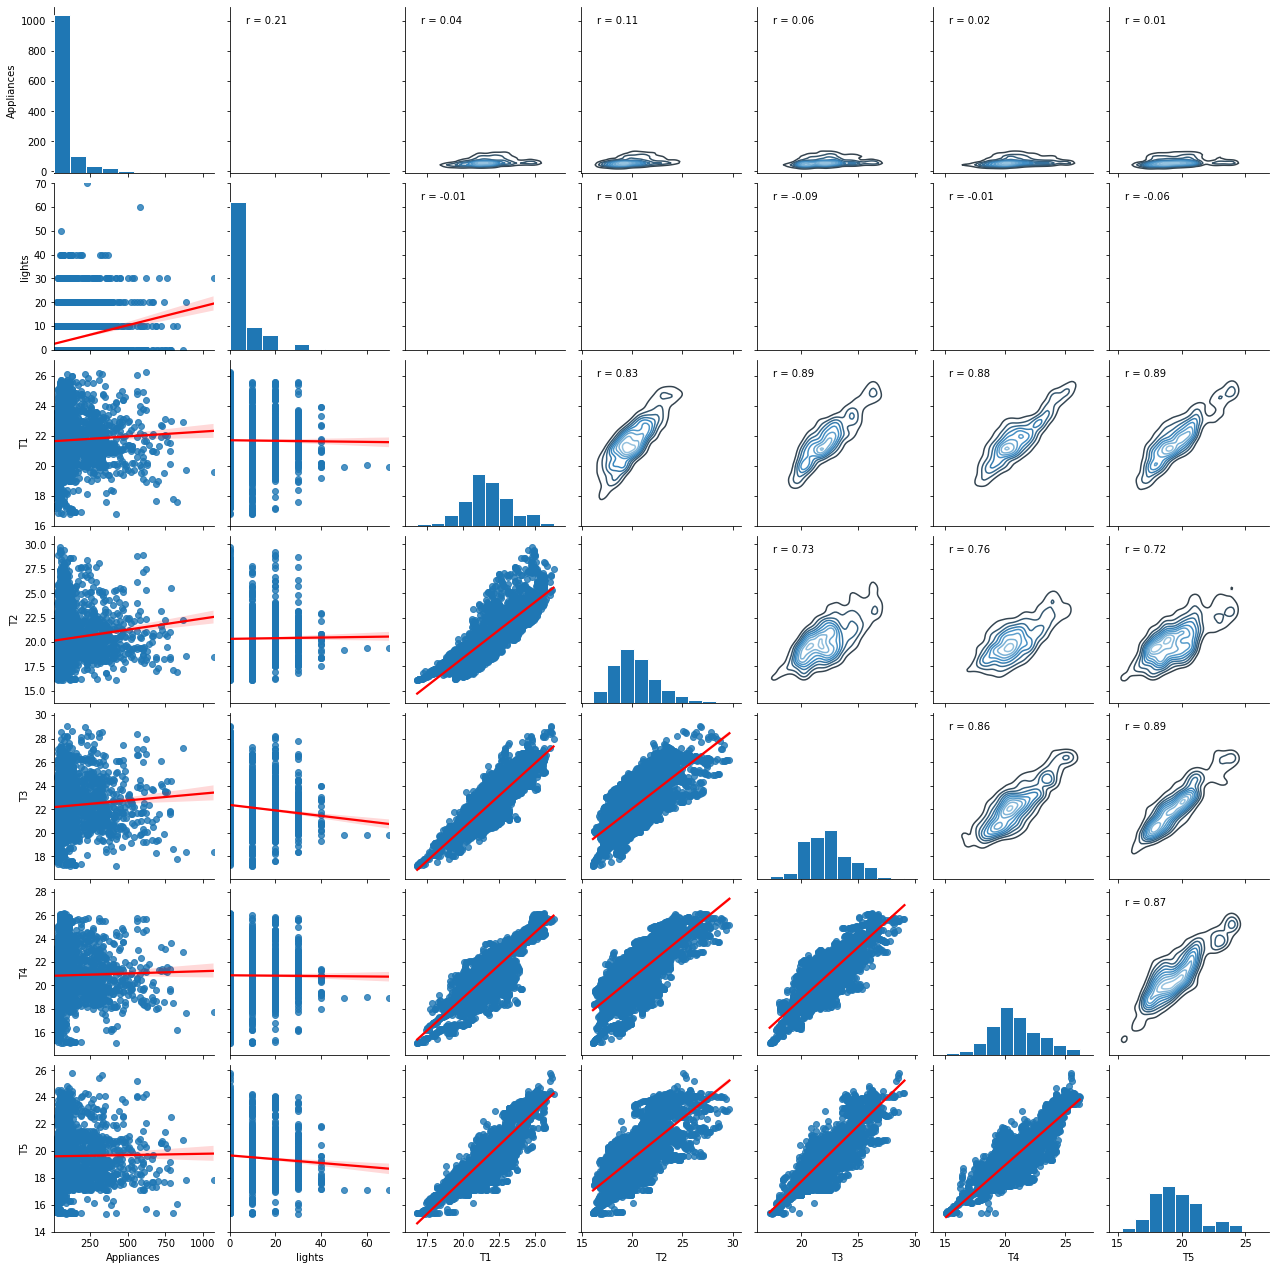

In [73]:
plots = tclean[['date', 'Appliances', 'lights', 'T1', 'T2', 'T3', 'T4', 'T5']]
g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color': 'red'})
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corr)
g.map_upper(sns.kdeplot, cmap="Blues_d")

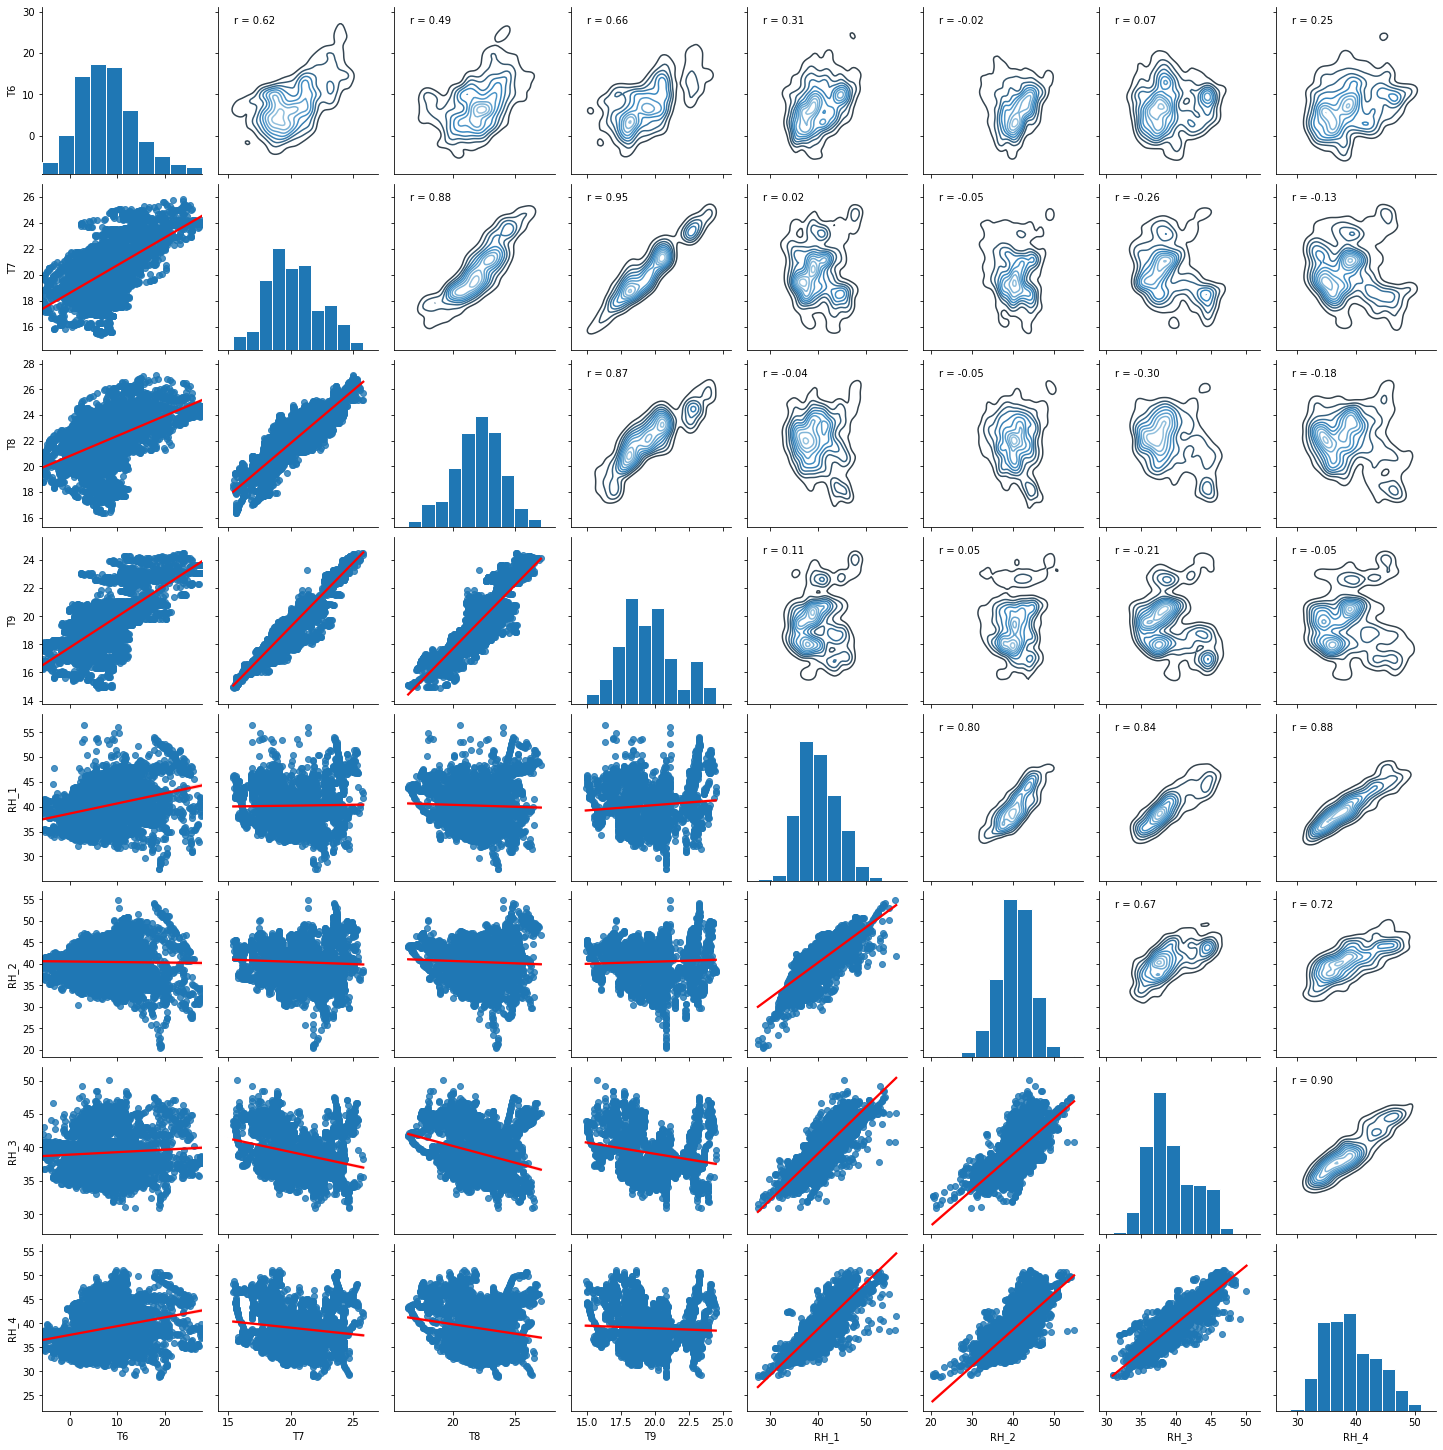

In [74]:
plots = tclean[['T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2', 'RH_3', 'RH_4']]
g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color': 'red'})
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corr)
g.map_upper(sns.kdeplot, cmap="Blues_d")

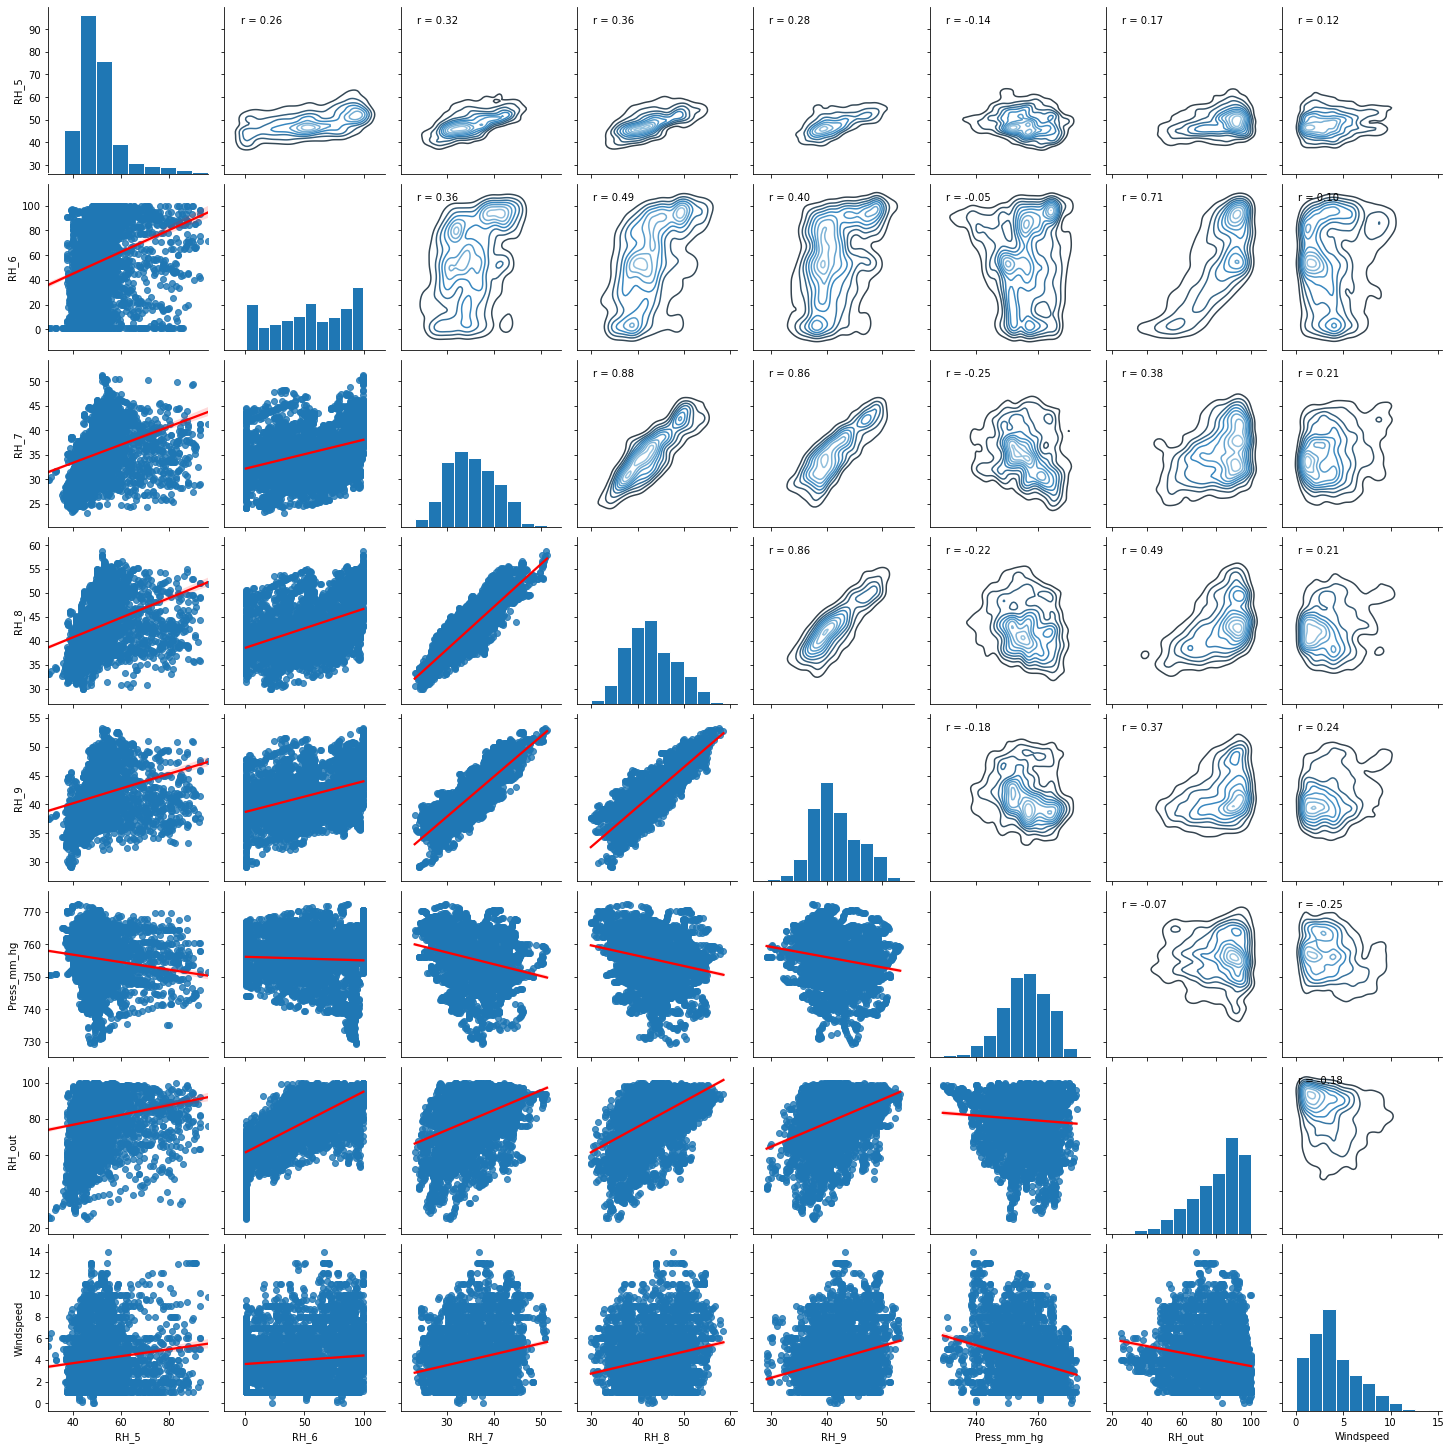

In [75]:
plots = tclean[['RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed']]
g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color': 'red'})
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corr)
g.map_upper(sns.kdeplot, cmap="Blues_d")

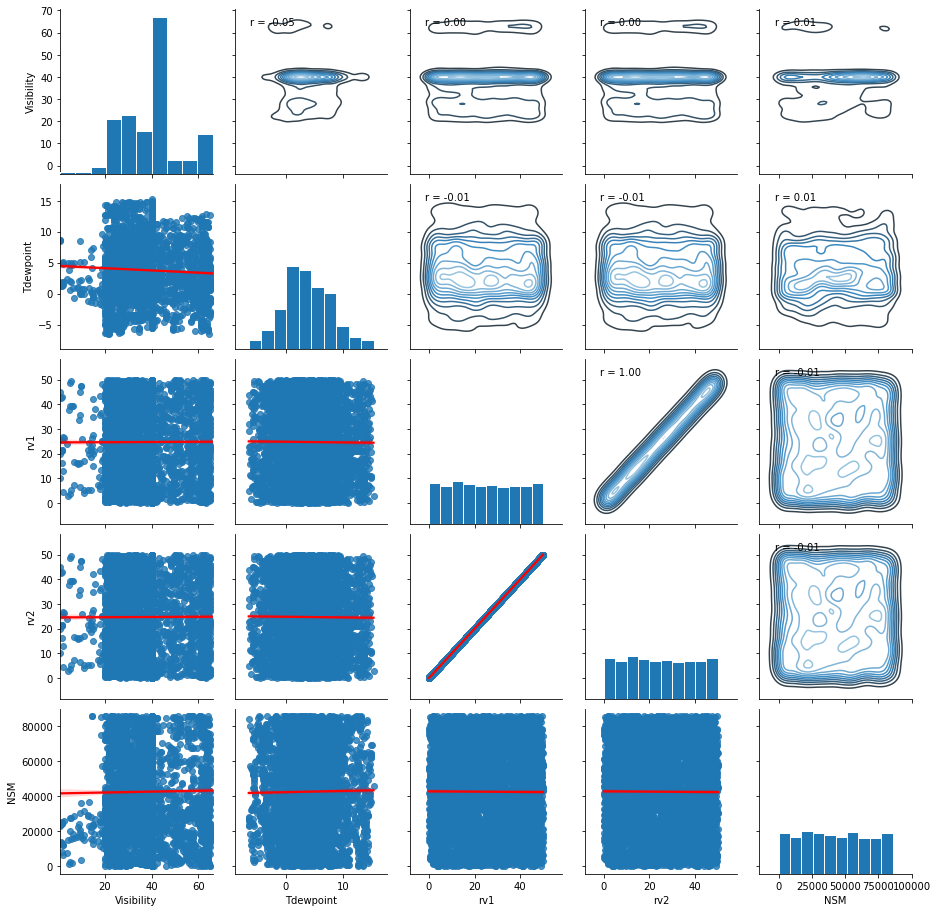

In [76]:
plots = tclean[['Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']]
g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color': 'red'})
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corr)
g.map_upper(sns.kdeplot, cmap="Blues_d")

TypeError: 'DataFrame' object is not callable

In [83]:
x_train = tclean(['Appliances', 'lights'], axis=1)

TypeError: 'DataFrame' object is not callable

In [98]:
x_train = train.drop(['date', 'WeekStatus', 'Day_of_week', 'lights'], axis = 1)
y_train = train['Appliances']
x_test = test.drop(['date', 'WeekStatus', 'Day_of_week', 'lights'], axis = 1)
y_test = test['Appliances']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(14803, 29)
(14803,)
(4932, 29)
(4932, 29)


In [103]:
model1 = LinearRegression()

model1.fit(x_train, y_train)

y_train_hat = model1.predict(x_train)
y_test_hat = model1.predict(x_test)

print("The score on testing set is: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat)))
print("R2: ", r2_score(y_test, y_test_hat))
print("MAE: ", mean_absolute_error(y_test, y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_hat))
print()
print()
print("The score on training set is: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat)))
print("R2: ", r2_score(y_train, y_train_hat))
print("MAE: ", mean_absolute_error(y_train, y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_train_hat))

The score on testing set is: 
RMSE:  2.985761623298396e-12
R2:  1.0
MAE:  2.4353358835722044e-12
MAPE:  3.671495524835985e-12


The score on training set is: 
RMSE:  3.0062414843081055e-12
R2:  1.0
MAE:  2.459924103156715e-12
MAPE:  3.699254572713912e-12


In [104]:
## model 2

In [105]:
x_train = train.drop(['date', 'WeekStatus', 'Day_of_week'], axis = 1)
y_train = train['Appliances']
x_test = test.drop(['date', 'WeekStatus', 'Day_of_week'], axis = 1)
y_test = test['Appliances']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(14803, 29)
(14803,)
(4932, 29)
(4932, 29)


In [106]:
model2 = LinearRegression()

model2.fit(x_train, y_train)

y_train_hat = model2.predict(x_train)
y_test_hat = model2.predict(x_test)

print("The score on testing set is: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat)))
print("R2: ", r2_score(y_test, y_test_hat))
print("MAE: ", mean_absolute_error(y_test, y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_hat))
print()
print()
print("The score on training set is: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat)))
print("R2: ", r2_score(y_train, y_train_hat))
print("MAE: ", mean_absolute_error(y_train, y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_train_hat))

The score on testing set is: 
RMSE:  2.985761623298396e-12
R2:  1.0
MAE:  2.4353358835722044e-12
MAPE:  3.671495524835985e-12


The score on training set is: 
RMSE:  3.0062414843081055e-12
R2:  1.0
MAE:  2.459924103156715e-12
MAPE:  3.699254572713912e-12


In [107]:
print("The column light is not contributing therefore can be excluded")

The column light is not contributing therefore can be excluded
